Team Members:\
Aryaman Gokarn(506303588)\
Mugdha Bhagwat(606297799)\
Tania Rajabally(806153219)


# **Reinforcement learning (RL)**

### QUESTION 1

In [ ]:
#Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits import mplot3d
import pandas as pd
from cvxopt import matrix, solvers
from tqdm import tqdm

In [ ]:
# Define the size of the grid
grid_size = 10
total_states = grid_size * grid_size

# Generate Reward Function 1
reward_function1 = np.zeros((10,10))
reward_function1[9,9] = 1.0
reward_function1[2:4,5:7] = -10
reward_function1[4:6,1:3] = -10
reward_function1[8:,2:4] = -10

# Generate Reward Function 2
reward_function2 = np.zeros((10,10))
reward_function2[1:7,4] = -100
reward_function2[1,4:7] = -100
reward_function2[1:4,6] = -100
reward_function2[3,6:9] = -100
reward_function2[3:8,8] = -100
reward_function2[7:9,6] = -100
reward_function2[7,6:9] = -100
reward_function2[9,9] = 10

In [ ]:
# Function to plot a heatmap
def plot_heatmap(data, title, colorbar_label):
    plt.figure(figsize=(8, 6))
    heatmap = plt.pcolor(data, cmap='GnBu', edgecolors='k', linewidth=2)
    plt.title(title)
    plt.colorbar(heatmap, label=colorbar_label)
    plt.axis([0, grid_size, 0, grid_size])
    plt.gca().invert_yaxis()
    plt.xticks(np.arange(0, grid_size + 1, 1), np.arange(0, grid_size + 1))
    plt.yticks(np.arange(0, grid_size + 1, 1), np.arange(0, grid_size + 1))
    plt.show()

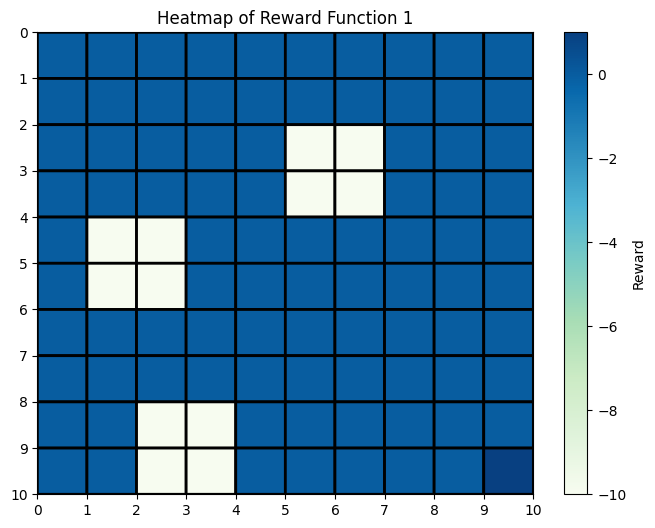

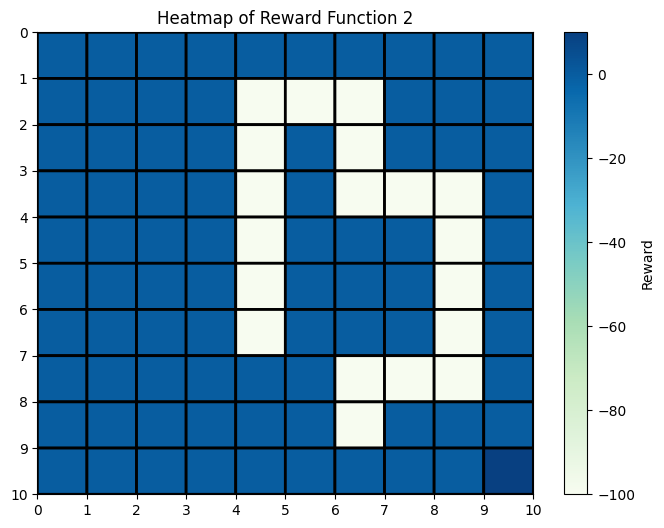

In [ ]:
# Plotting the heatmaps
plot_heatmap(reward_function1, 'Heatmap of Reward Function 1', 'Reward')
plot_heatmap(reward_function2, 'Heatmap of Reward Function 2', 'Reward')

Question 1: (10 points) For visualization purpose, generate heat maps of Reward function 1 and Reward function 2. For the heat maps, make sure you display the coloring scale. You will have 2 plots for this question

> Refer to the heatmaps above. A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. We can refer to the scale on the side to see the corresponding reward values.

# **Optimal policy learning using RL algorithms**

### QUESTION 2

In [ ]:
# Define and map state space
state_space = np.zeros(shape=(10,10))
val=0.0
for i in range(0,10):
    for j in range(0,10):
        state_space[j][i]=val
        val=val+1
state_space

array([[ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.],
       [ 1., 11., 21., 31., 41., 51., 61., 71., 81., 91.],
       [ 2., 12., 22., 32., 42., 52., 62., 72., 82., 92.],
       [ 3., 13., 23., 33., 43., 53., 63., 73., 83., 93.],
       [ 4., 14., 24., 34., 44., 54., 64., 74., 84., 94.],
       [ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.],
       [ 6., 16., 26., 36., 46., 56., 66., 76., 86., 96.],
       [ 7., 17., 27., 37., 47., 57., 67., 77., 87., 97.],
       [ 8., 18., 28., 38., 48., 58., 68., 78., 88., 98.],
       [ 9., 19., 29., 39., 49., 59., 69., 79., 89., 99.]])

In [ ]:
# Define Transition Probability Function
def transition_probability(w):
    transition_probability_left= np.zeros(shape=(100,100))
    transition_probability_right= np.zeros(shape=(100,100))
    transition_probability_up= np.zeros(shape=(100,100))
    transition_probability_down= np.zeros(shape=(100,100))

    #Transition Probability for each state when the action is Left
    for i in range(0,100):
        if(i%10==0):
            transition_probability_left[i][i]+=w/4
        else:
            transition_probability_left[i][i-1]=w/4
        if(i-10<0):
            transition_probability_left[i][i]+=w/4
        else:
            transition_probability_left[i][i-10]=1-w+w/4
        if(i+10>99):
            transition_probability_left[i][i]+=w/4
        else:
            transition_probability_left[i][i+10]=w/4
        if((i+1)%10==0):
            transition_probability_left[i][i]+=w/4
        else:
            transition_probability_left[i][i+1]=w/4
        if(i-10<0):
            transition_probability_left[i][i]+=1-w

    #Transition Probability for each state when the action is Right
    for i in range(0,100):
        if(i%10==0):
            transition_probability_right[i][i]+=w/4
        else:
            transition_probability_right[i][i-1]=w/4
        if(i-10<0):
            transition_probability_right[i][i]+=w/4
        else:
            transition_probability_right[i][i-10]=w/4
        if(i+10>99):
            transition_probability_right[i][i]+=w/4
        else:
            transition_probability_right[i][i+10]=1-w+w/4
        if((i+1)%10==0):
            transition_probability_right[i][i]+=w/4
        else:
            transition_probability_right[i][i+1]=w/4
        if(i+10>99):
            transition_probability_right[i][i]+=1-w

    # Transition Probability for each state when the action is Up
    for i in range(0,100):
        if(i%10==0):
            transition_probability_up[i][i]+=w/4
        else:
            transition_probability_up[i][i-1]=1-w+w/4
        if(i-10<0):
            transition_probability_up[i][i]+=w/4
        else:
            transition_probability_up[i][i-10]=w/4
        if(i+10>99):
            transition_probability_up[i][i]+=w/4
        else:
            transition_probability_up[i][i+10]=w/4
        if((i+1)%10==0):
            transition_probability_up[i][i]+=w/4
        else:
            transition_probability_up[i][i+1]=w/4
        if(i%10==0):
            transition_probability_up[i][i]+=1-w

    # Transition Probability for each state when the action is Down
    for i in range(0,100):
        if(i%10==0):
            transition_probability_down[i][i]+=w/4
        else:
            transition_probability_down[i][i-1]=w/4
        if(i-10<0):
            transition_probability_down[i][i]+=w/4
        else:
            transition_probability_down[i][i-10]=w/4
        if(i+10>99):
            transition_probability_down[i][i]+=w/4
        else:
            transition_probability_down[i][i+10]=w/4
        if((i+1)%10==0):
            transition_probability_down[i][i]+=w/4
        else:
            transition_probability_down[i][i+1]=1-w+w/4
        if((i+1)%10==0):
            transition_probability_down[i][i]+=1-w
    P_matrix = np.stack((transition_probability_left, transition_probability_right, transition_probability_up, transition_probability_down))
    return P_matrix

In [ ]:
# Value Iteration using matrix multiplications.
def optimal_value(num_states,P_matrix,reward_function,epsilon,gamma):
    V=np.zeros((100,))
    delta=np.inf
    reward_function = (reward_function.T).ravel() # because the state space is column first.
    N=0
    all_delta_array=[]
    intermediate_delta_array = []
    intermediate_V=[]
    step_number = []
    while delta>epsilon:
        N=N+1
        v_next=np.amax(np.matmul(P_matrix,reward_function+gamma*V), axis=0)
        delta=np.amax(np.abs(v_next-V))
        all_delta_array.append(delta)
        V=v_next
        if N%4==0:
            step_number.append(N)
            intermediate_delta_array.append(delta)
            intermediate_V.append(np.transpose(V.reshape(10,10)))
    print("Number of steps for Value Iteration Algorithm to converge:", N)
    print("Number of intermediate steps captured:", len(intermediate_V))
    print("The step numbers captured are:",step_number)
    return V, intermediate_V, all_delta_array, intermediate_delta_array, step_number

In [ ]:
# Compute optimal value for given parameters
num_states=100
discount_factor=0.8
w=0.1
epsilon=0.01
reward_function = reward_function1

# get transition probablities matrix - dimension: (num_actions x num_states_num_states)
P_matrix = transition_probability(w)

# get optimal Value
V,intermediate_V,all_delta_array,intermediate_delta_array,step_number=optimal_value(num_states,P_matrix,reward_function,epsilon,discount_factor)
optimal_V=np.transpose(V.reshape(10,10))

Number of steps for Value Iteration Algorithm to converge: 22
Number of intermediate steps captured: 5
The step numbers captured are: [4, 8, 12, 16, 20]


In [ ]:
#Printing the optimal values
optimal_V

array([[ 0.03601957,  0.05478216,  0.07971521,  0.11185318,  0.15319264,
         0.20650454,  0.28180223,  0.37459466,  0.48513911,  0.60956168],
       [ 0.02228448,  0.03647988,  0.05542631,  0.08006788,  0.1019543 ,
        -0.11237761,  0.09069336,  0.4721713 ,  0.62531487,  0.78710339],
       [ 0.01182773,  0.01651939,  0.03130019,  0.05036259, -0.19085531,
        -0.60410515, -0.25615093,  0.3556118 ,  0.80730632,  1.0184377 ],
       [-0.00655603, -0.26208876, -0.23026923,  0.05485174,  0.08236758,
        -0.25265714, -0.10289922,  0.54323602,  1.04635018,  1.31508229],
       [-0.28277155, -0.72595241, -0.46954346,  0.08615236,  0.46907377,
         0.36055759,  0.54512447,  1.043136  ,  1.35137545,  1.69522302],
       [-0.25667254, -0.62563251, -0.36571612,  0.21525967,  0.62901516,
         0.813928  ,  1.04876847,  1.35313706,  1.73332623,  2.18239128],
       [ 0.03150298, -0.12408103,  0.19323318,  0.61793684,  0.81895939,
         1.05424497,  1.3533849 ,  1.73461161

In [ ]:
# Single-line to create a colormap that transitions from white to blue
cmap = LinearSegmentedColormap.from_list("custom_white", ["white", "white"])

Step Number:  4
Value of Delta:  0.4844856000000002


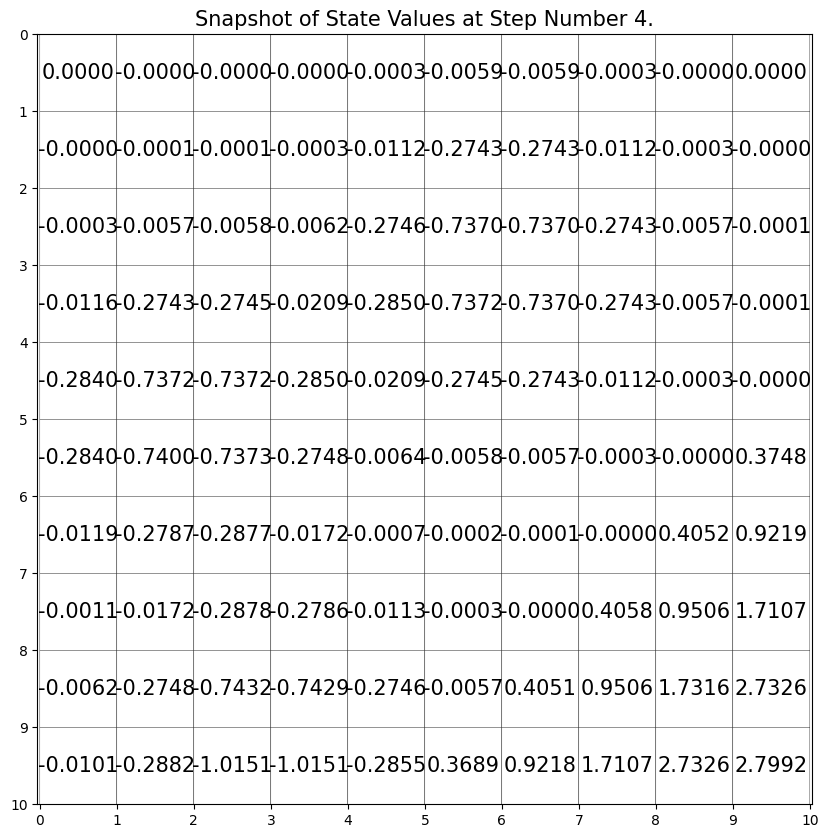

Step Number:  8
Value of Delta:  0.19838867471340826


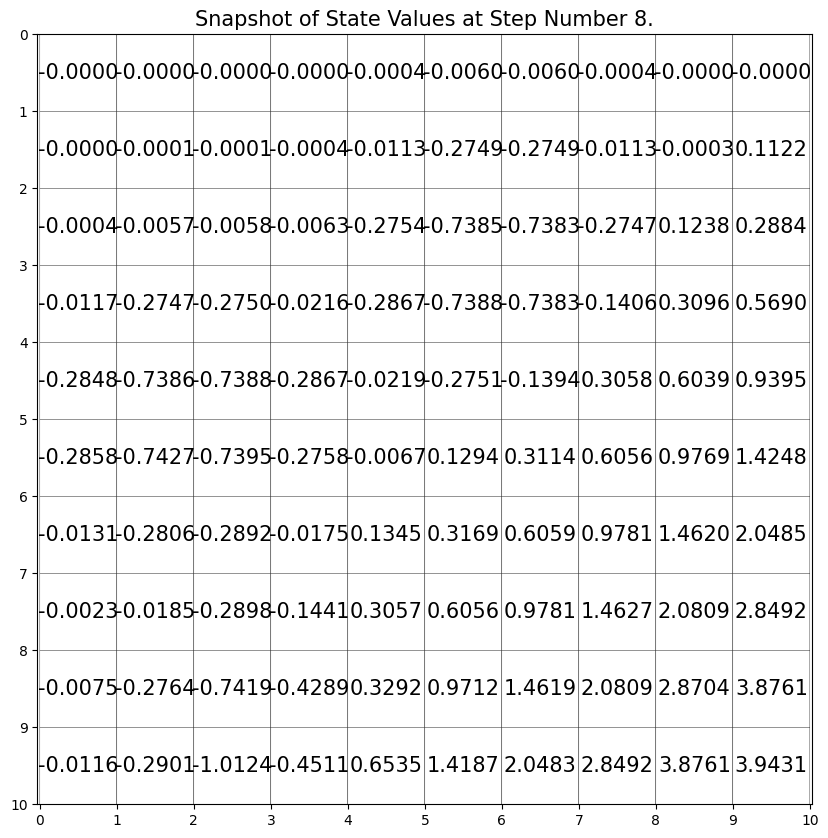

Step Number:  12
Value of Delta:  0.08125961731799336


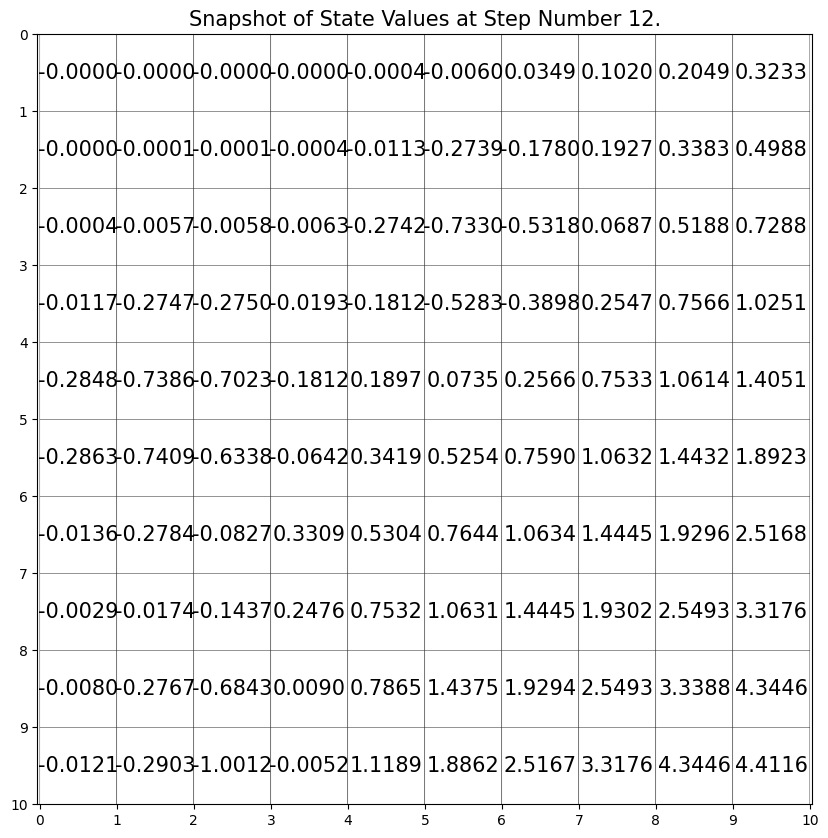

Step Number:  16
Value of Delta:  0.033283935823336996


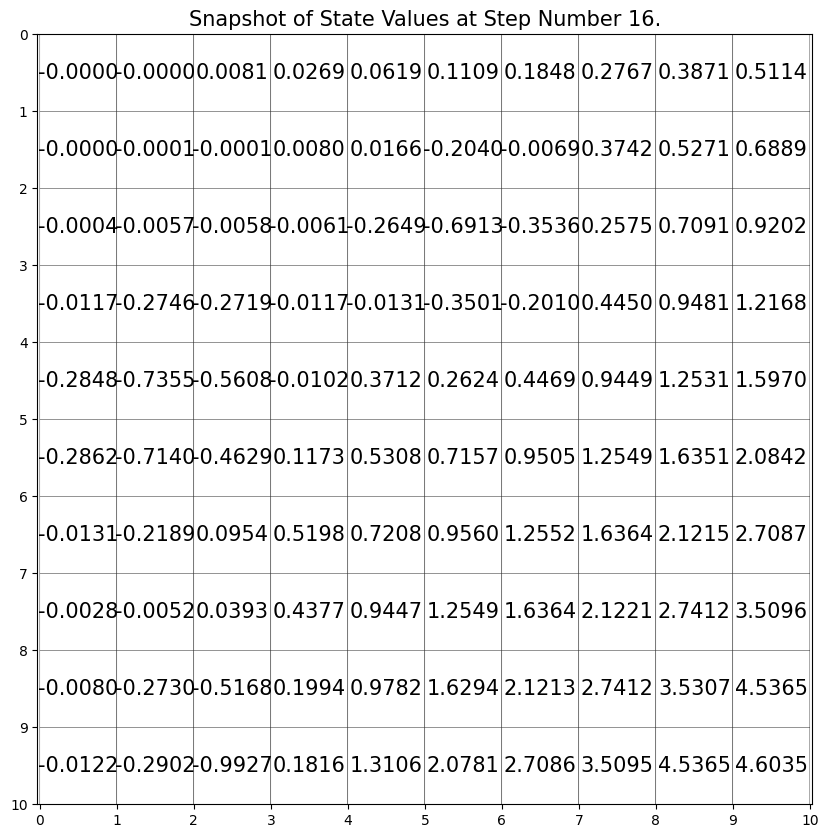

Step Number:  20
Value of Delta:  0.013633100077943716


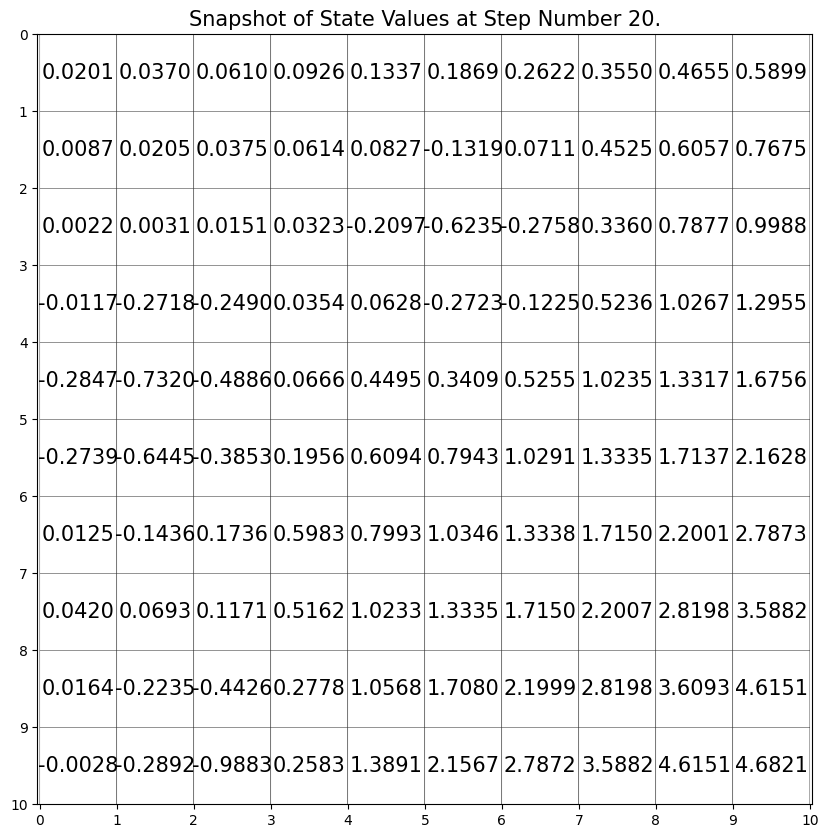

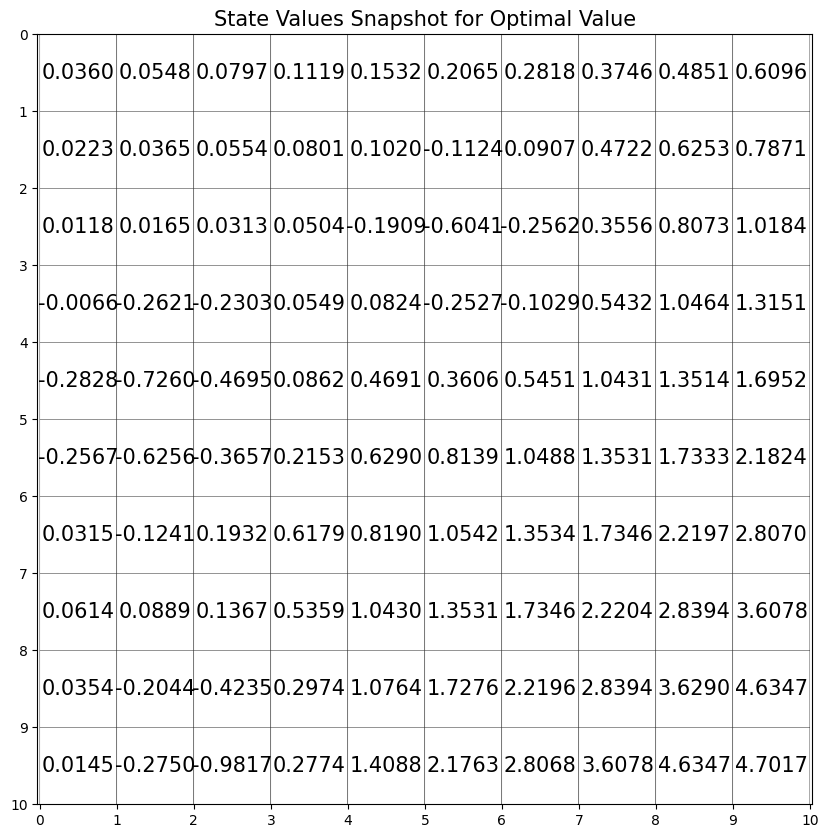

Text(0.5, 1.0, 'Change in delta over Steps')

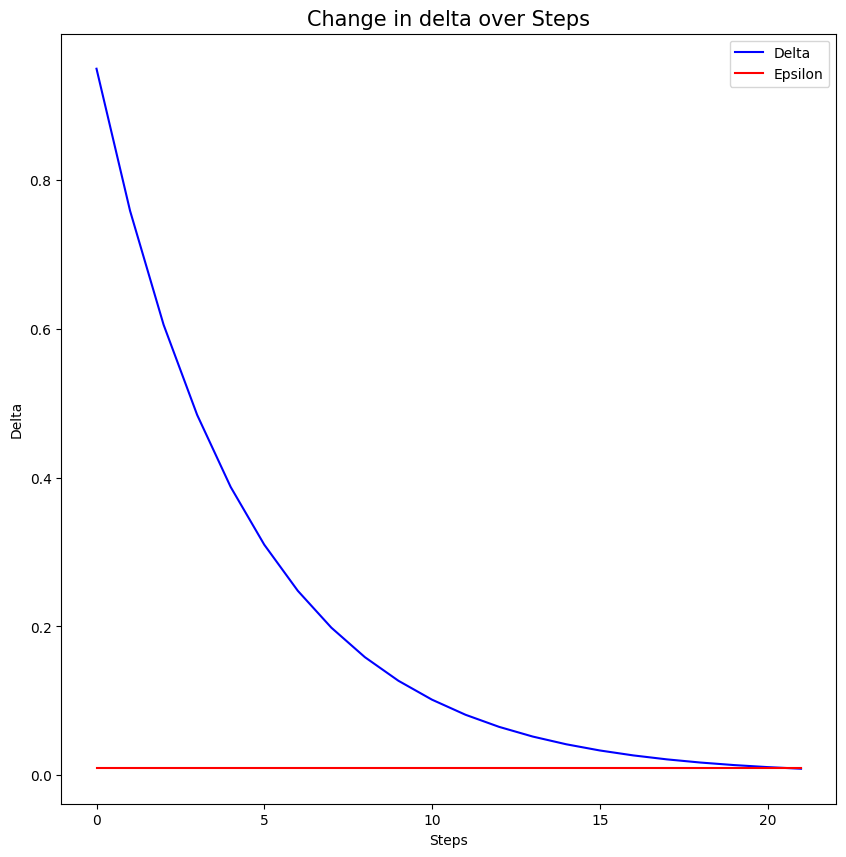

In [ ]:
#Plotting the state values
def plot_state_value(state_value, title):
    plt.figure(figsize=(10,10))
    plt.pcolor(state_value, cmap=cmap, edgecolors='black')
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.title(title, fontsize=15)
    plt.xticks(np.arange(0, grid_size + 1, 1), np.arange(0, grid_size + 1))
    plt.yticks(np.arange(0, grid_size + 1, 1), np.arange(0, grid_size + 1))
    for y in range(state_value.shape[0]):
        for x in range(state_value.shape[1]):
            plt.text(x + 0.5, y + 0.5, '%.4f' % state_value[y, x],
                horizontalalignment='center',
                verticalalignment='center', fontsize=15)
    plt.show()

# plot state values for 5 intermediate steps
for i in range(len(intermediate_V)):
    print("Step Number: ", step_number[i])
    print("Value of Delta: ", intermediate_delta_array[i])
    plot_state_value(intermediate_V[i], "Snapshot of State Values at Step Number {0}.".format(step_number[i]))


# plot state values for optimal value
plot_state_value(optimal_V, "State Values Snapshot for Optimal Value")

# plot change in delta
epsilon_array=[epsilon] * len(all_delta_array)
plt.figure(figsize=(10,10))
plt.plot(all_delta_array, color='blue', label='Delta')
plt.plot(epsilon_array, color='red',label='Epsilon')
plt.xlabel("Steps")
plt.ylabel("Delta")
plt.legend()
plt.title("Change in delta over Steps",fontsize=15)

Question 2: (40 points) Create the environment of the agent using the information
provided in section 2. To be specific, create the MDP by setting up the state-space,
action set, transition probabilities, discount factor, and reward function. For creating the
environment, use the following set of parameters:
* Number of states = 100 (state space is a 10 by 10 square grid as displayed in figure
1)
* Number of actions = 4 (set of possible actions is displayed in figure 2)
* w = 0.1
* Discount factor = 0.8
* Reward function 1

After you have created the environment, then write an optimal state-value function that
takes as input the environment of the agent and outputs the optimal value of each state
in the grid. For the optimal state-value function, you have to implement the Initialization
(lines 2-4) and Estimation (lines 5-13) steps of the Value Iteration algorithm. For the
estimation step, use  = 0.01. For visualization purpose, you should generate a figure
similar to that of figure 1 but with the number of state replaced by the optimal value of
that state. In this part of question, you should have 1 plot.
Let’s assume that your value iteration algorithm converges in N steps. Plot snapshots
of state values in 5 different steps linearly distributed from 1 to N. Report N and your
step numbers. What observations do you have from the plots?

> Refer to the plots above.

> From the optimal value of the state plot, we can see that the values are close to 0 i.e they are low in the initial states and then they start increasing as we reach the states with the maximum reward value.

> From the plots of the different steps, we can see that in each step, the values are increasing. As we can see in the change in delta plot, first the values increase drastically i.e the delta values are high and then it starts becoming constant by the time it reaches the last step.

> State 99 has the highest optimal value which is evident because state 99 has the highest reward for reward function 1. As one moves further from state 99, the optimal value of each state decreases slowly. In addition, the blocks of states which yield negative reward show negative optimal values. The neighboring states near these blocks also have a lower optimal value compared to the neighboring states near the state yielding the highest reward. In other words, as an agent moves towards states with low reward, the optimal values of the neighboring states will progressively decrease, whereas if an agent moves towards desirable states with higher reward, the optimal values of the states it faces will progressively increase. Most of the states have a value of 0 during the earlier steps, yielding a sparse matrix. However, as steps increase, the state values near state 99 (state with highest reward) starts to increase gradually, while the state values near the states with negative reward start to decrease progressively. Since state 99 has the highest reward, the values increase much faster for state 99 and its neighboring states. As the algorithm nears convergence, the sparsity disappears, with most of the states assigned a certain non-zero optimal value, with the states near state 99 being assigned very high and positive values and states near the blocks with negative reward being assigned negative values. We can also observe that the rate of change of state values is faster during initial steps, following a logarithmic rate of convergence.


### QUESTION 3

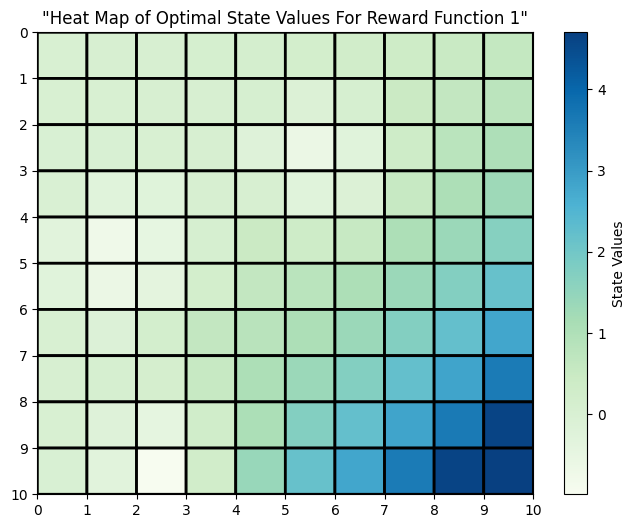

In [ ]:
#Plotting the heatmap
plot_heatmap(optimal_V, '"Heat Map of Optimal State Values For Reward Function 1"', 'State Values')

Question 3: (5 points) Generate a heat map of the optimal state values across the 2-
D grid. For generating the heat map, you can use the same function provided in the hint
earlier (see the hint after question 1).

> Refer to the heatmap above.

### QUESTION 4

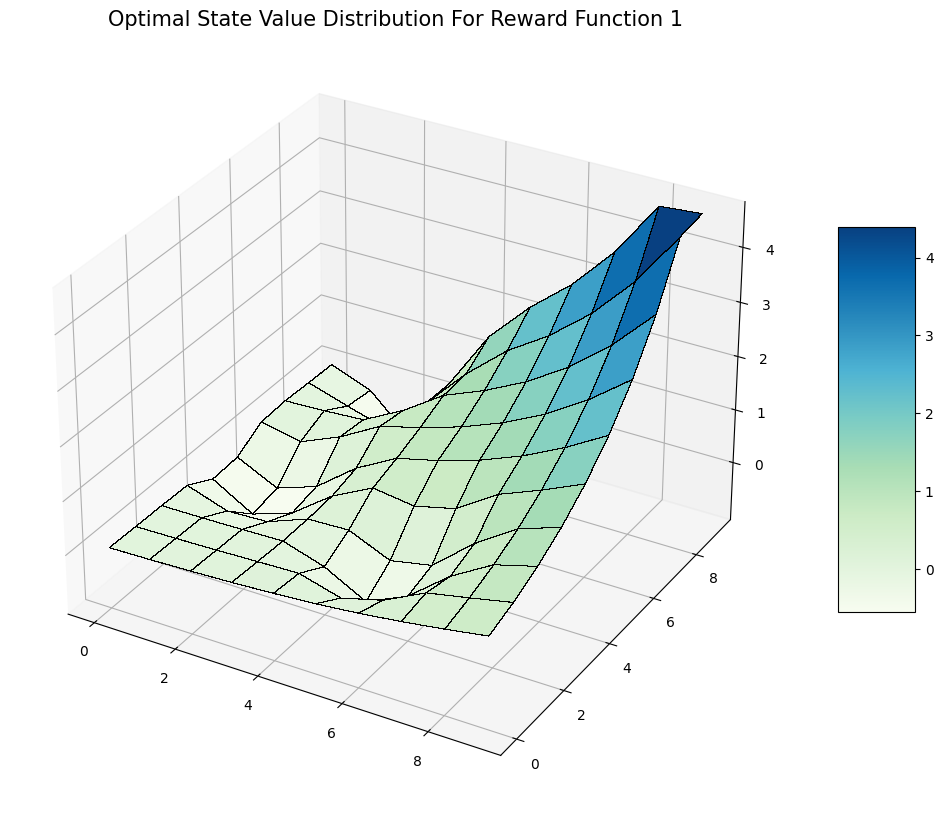

In [ ]:
# plot state values for optimal value
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection = '3d')
X=Y= np.arange(0,10,1)
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X,Y,optimal_V, cmap = "GnBu",edgecolors='black',
                       linewidth=0.01, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title("Optimal State Value Distribution For Reward Function 1",fontsize=15)
plt.show()

Question 4: (15 points) Explain the distribution of the optimal state values across the
2-D grid. (Hint: Use the figure generated in question 3 to explain)

> We can notice from the heatmap that the value of the state 99 is the maximum. This happens because reward function 1 gives maximum reward to the state 99. The higher optimal value a state has, the higher reward it can obtain. As you move away from state 99, the optimal state decreases gradually. The optimal state increases as expected i.e it increases gradually as the agent moves towards state 99. As we go close to the exit, the value increases. When we are far from the exit, the values are low. As one moves further from state 99, which is the state providing the highest reward, the optimal value of each state decreases slowly. In addition, the neighboring states near the blocks yielding negative reward also have a lower optimal value compared to the neighboring states near the state yielding the highest reward. In other words, as an agent moves towards states with low reward, the optimal values of the neighboring states will progressively decrease, whereas if an agent moves towards desirable states with higher reward, the optimal values of the states it faces will progressively increase. There is a visible, progressive and gradual decay of optimal values surrounding the state with the highest reward. This is due to the discount factor in the Bellman equation, which discounts future rewards. The patterns seen in the heatmap of reward function 1 are roughly visible in the heatmap of optimal values. There are three blocks of negative rewards for reward function 1. One can almost make out the same three blocks from the heatmap of optimal values within the same expected regions in the state space. In addition, the region near the state with the highest reward is also brighter. This provides us with an intuition that it is possible to extract reward function by observing how the environment or an expert behaves. This is roughly what is done in inverse reinforcement learning (IRL).


### QUESTION 5

In [ ]:
# Value Iteration using matrix multiplications.
def optimal_state_policy(num_states,P_matrix,reward_function,epsilon,gamma):
    V=np.zeros((100,))
    delta=np.inf
    reward_function = (reward_function.T).ravel() # because the state space is column first.
    while delta>epsilon:
        v_next=np.amax(np.matmul(P_matrix,reward_function+gamma*V), axis=0)
        delta=np.amax(np.abs(v_next-V))
        V=v_next
    policy=np.argmax(np.matmul(P_matrix,reward_function+gamma*V), axis=0)
    return policy

In [ ]:
#Function to plot the policy
def plot_policy(policy,title=""):
    arrow_matrix=np.chararray((policy.shape[0], policy.shape[1]),unicode=True)
    for r in range(policy.shape[0]):
        for c in range(policy.shape[1]):
            # If policy says go left
            if policy[r][c] == 0:
                arrow_matrix[r][c] = u'\u2190'
            # If policy says go right
            elif policy[r][c] == 1:
                arrow_matrix[r][c] = u'\u2192'
            # If policy says go up
            elif policy[r][c] == 2:
                arrow_matrix[r][c] =u'\u2191'
            # If policy says go down
            elif policy[r][c] == 3:
                arrow_matrix[r][c] = u'\u2193'

    plt.figure(figsize=(10,10))
    plt.pcolor(policy, cmap=cmap, edgecolors='black')
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xticks(np.arange(0, grid_size + 1, 1), np.arange(0, grid_size + 1))
    plt.yticks(np.arange(0, grid_size + 1, 1), np.arange(0, grid_size + 1))
    for y in range(policy.shape[0]):
        for x in range(policy.shape[1]):
            plt.text(x + 0.5, y + 0.5, arrow_matrix[y,x],
                horizontalalignment='center',
                verticalalignment='center',fontsize=15,weight="bold")
    plt.show()

In [ ]:
#Finding the optimal policy and printing it
temp_policy=optimal_state_policy(num_states,P_matrix,reward_function,epsilon,discount_factor)
optimal_policy=np.transpose(temp_policy.reshape(10,10))
print(optimal_policy)

[[1 1 1 1 1 1 1 1 3 3]
 [1 1 1 2 2 2 1 1 3 3]
 [2 2 2 2 2 2 1 1 3 3]
 [2 2 1 3 3 3 3 1 3 3]
 [2 2 1 1 3 3 3 3 3 3]
 [3 3 1 1 3 3 3 3 3 3]
 [3 1 1 1 1 1 1 3 3 3]
 [1 1 1 1 1 1 1 1 3 3]
 [2 2 2 1 1 1 1 1 1 3]
 [2 0 0 1 1 1 1 1 1 1]]


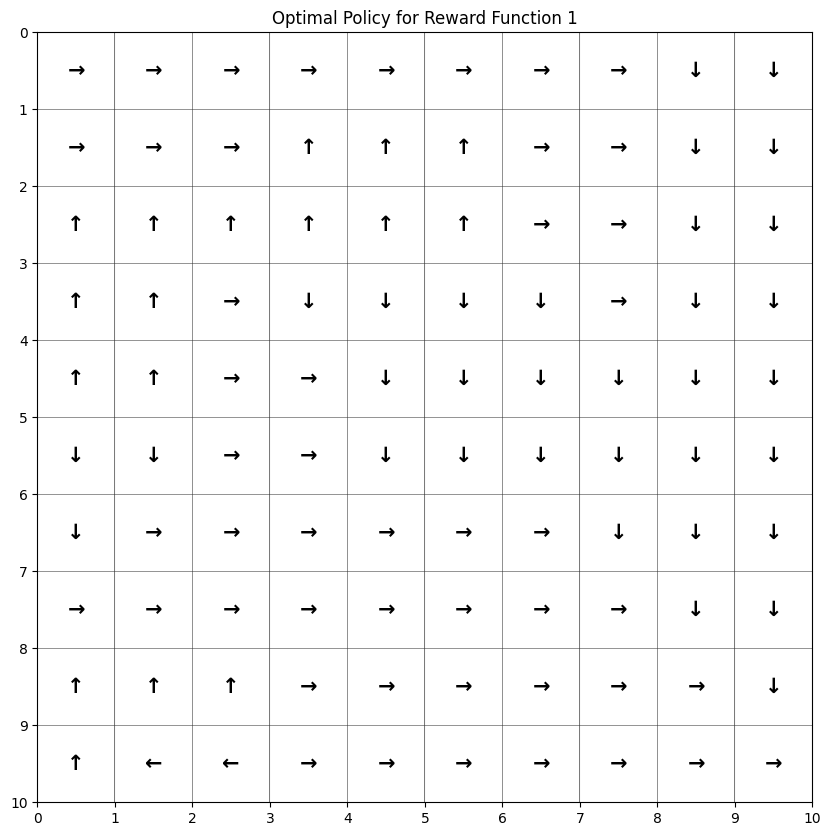

In [ ]:
#Plotting the optimal policy
plot_policy(optimal_policy,"Optimal Policy for Reward Function 1")

Question 5: (20 points) Implement the computation step of the value iteration algorithm (lines 14-17) to compute the optimal policy of the agent navigating the 2-D state-space.
For visualization purpose, you should generate a figure similar to that of figure 1 but
with the number of state replaced by the optimal action at that state. The optimal actions should be displayed using arrows. Does the optimal policy of the agent match your
intuition? Please provide a brief explanation. Is it possible for the agent to compute the
optimal action to take at each state by observing the optimal values of it’s neighboring
states? In this question, you should have 1 plot.

> From the above plot, we can see that the arrows are all leading or converging to state 99. Intuitively, this is what was supposed to be observed as the reward for state 99 is the highest and the agent should eventually find a path to that state. This can also be verified from the optimal values and the heat map of the optimal values which we depicted in the previous questions. According to the computation step of the Value-Iteration algorithm, the optimal policy will solely depend on the transition probabilities, discount factor and the optimal value of its neighboring states. However, in this case, we are not varying gamma i.e. the discount factor. Thus, the two factors which affect the optimal policy computation are the transition probabilities and the optimal value of the neighboring states. The algorithm then takes the max of all directions by considering the optimal values and the transition probabilities of the respective neighboring states. Thus, it first considers the optimal values of the neighboring states and then chooses an optimum value for itself. It is in this manner that the entire optimum policy is built. Also, the agent is likely to move in the direction which gives the best optimal value. In other words, all the other states tend to take actions to come nearer to the last state in order to get a higher reward. That is, all states go to their neighbor states with higher values. It is possible for the agent to compute the optimal action to take at each state by observing the optimal values of its neighboring states. This is evident when we check which way the arrow is pointing given the optimal values of neighboring states. At each state, the arrow always points towards that neighboring state whose optimal value is highest among all neighbors. As a result, for this particular case, even if the agent is unaware of future optimal values, the agent can still build an optimal policy just by observing the local optimal values within the neighborhood of each state. Thus we conclude that the agent computes the optimal action at each state by observing the optimal values of its neighboring states and deciding the best among them.

### QUESTION 6

In [ ]:
# Compute optimal value for given parameters
num_states=100
discount_factor=0.8
w=0.1
epsilon=0.01
reward_function = reward_function2

# get transition probablities matrix - dimension: (num_actions x num_states_num_states)
P_matrix = transition_probability(w)

# get optimal Value
V,intermediate_V,all_delta_array,intermediate_delta_array,step_number=optimal_value(num_states,P_matrix,reward_function,epsilon,discount_factor)
optimal_V=np.transpose(V.reshape(10,10))

Number of steps for Value Iteration Algorithm to converge: 32
Number of intermediate steps captured: 8
The step numbers captured are: [4, 8, 12, 16, 20, 24, 28, 32]


Step Number:  4
Value of Delta:  4.842216000000004


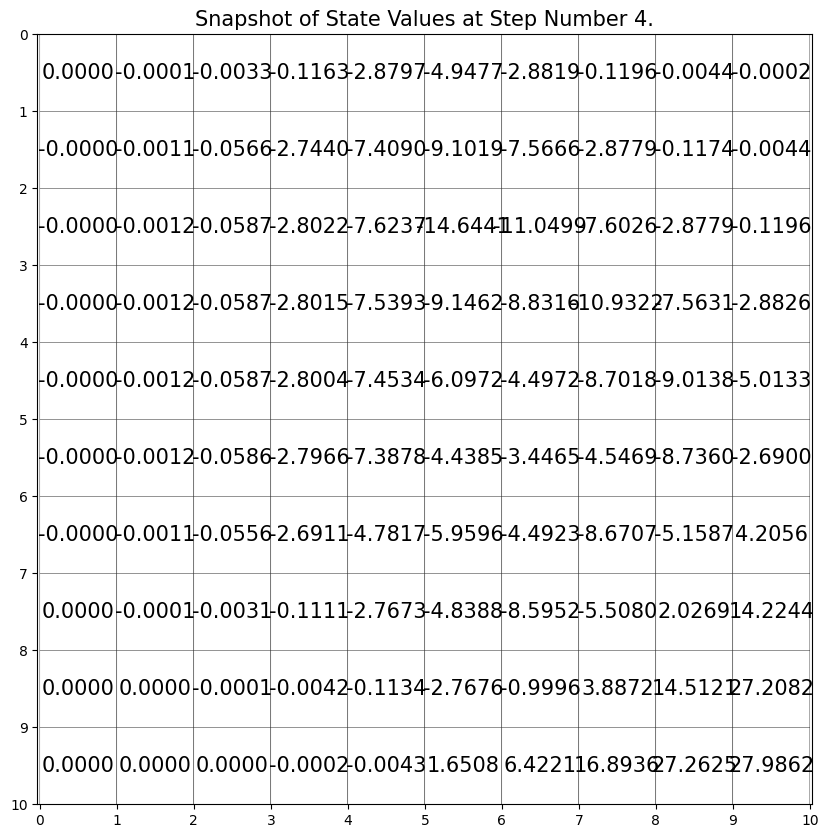

Step Number:  8
Value of Delta:  1.9827083568038404


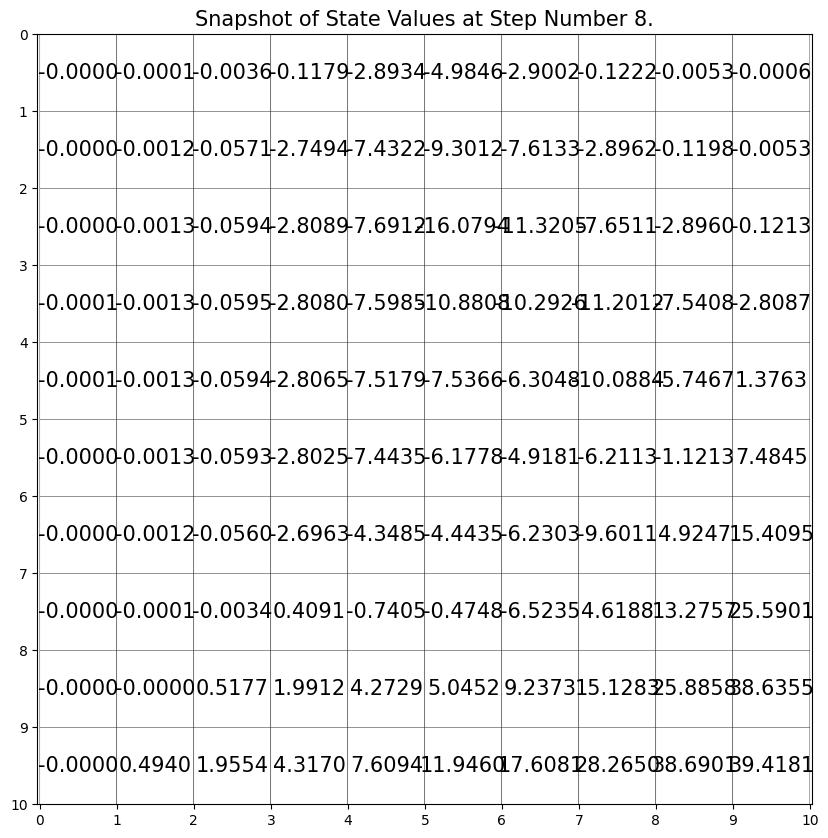

Step Number:  12
Value of Delta:  0.8121123856020347


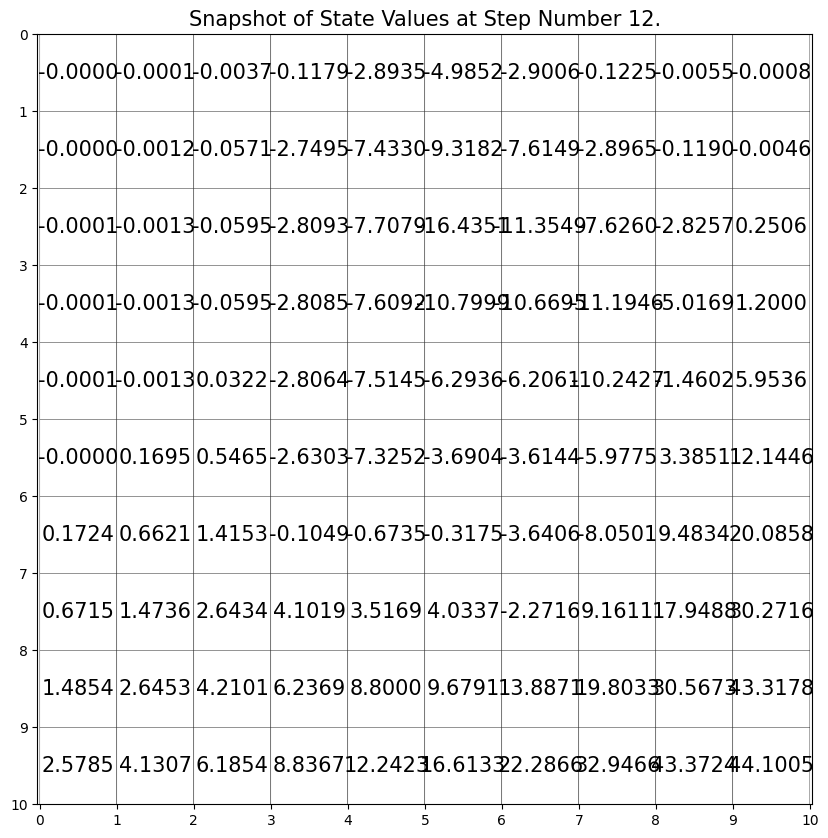

Step Number:  16
Value of Delta:  0.3326410412955383


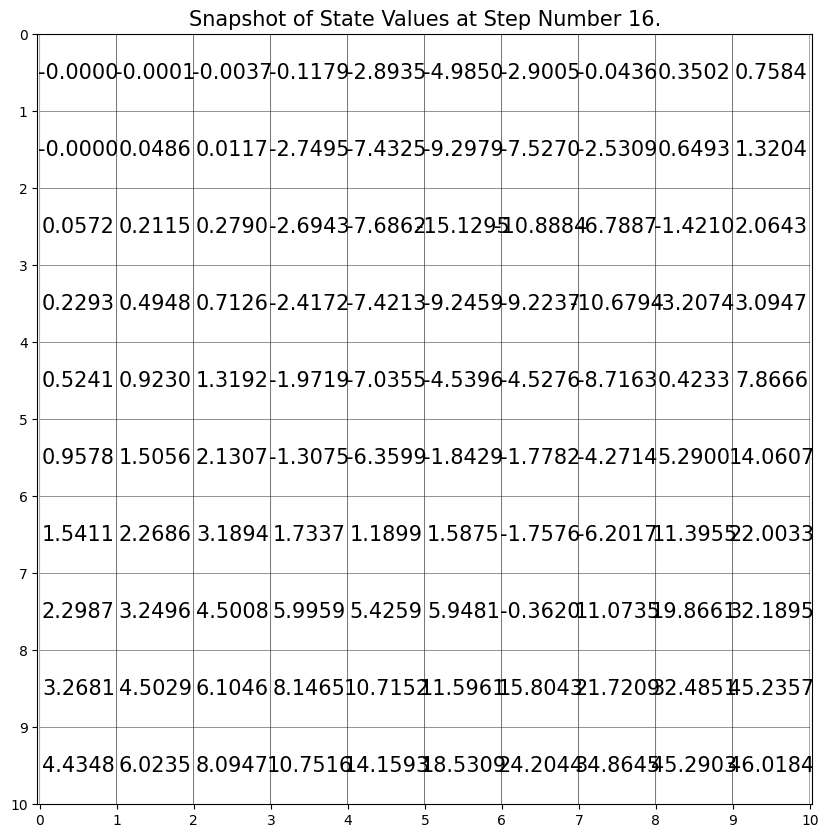

Step Number:  20
Value of Delta:  0.13624976237936437


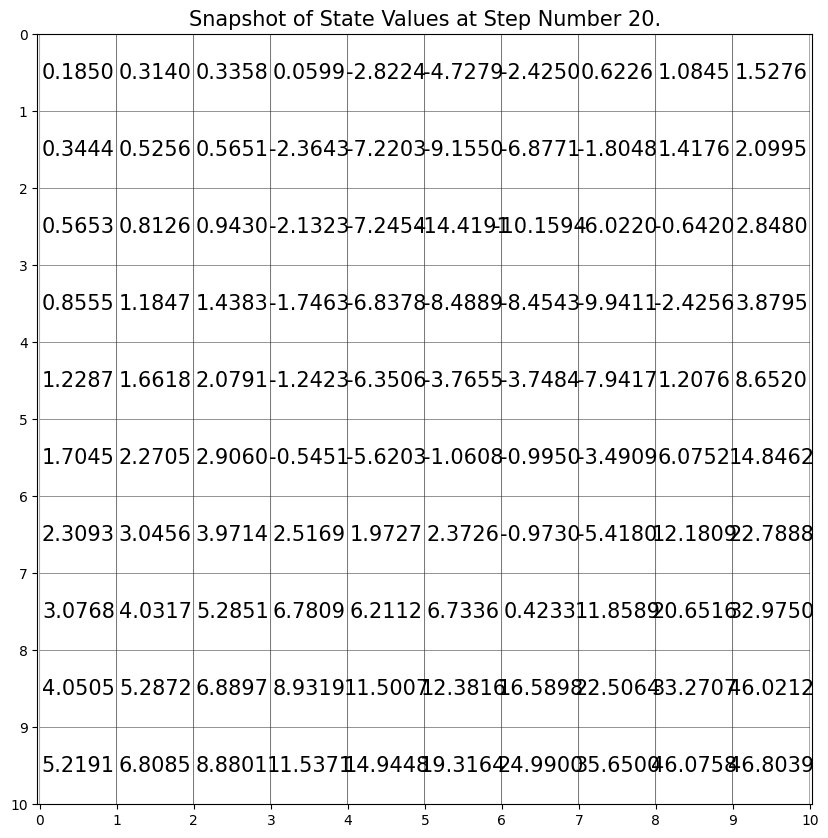

Step Number:  24
Value of Delta:  0.05580790246924039


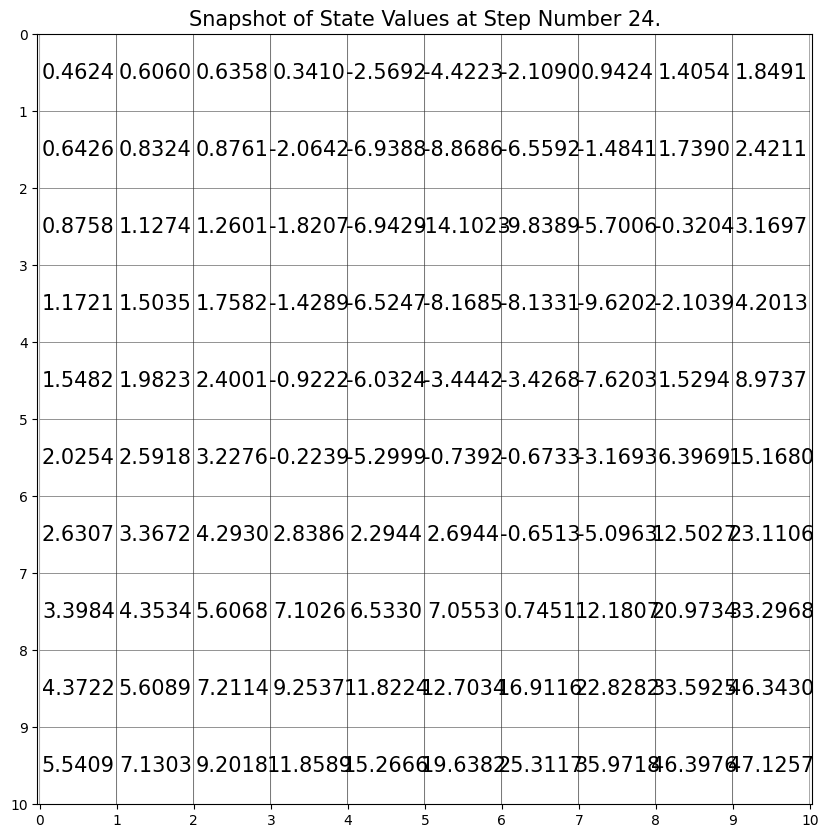

Step Number:  28
Value of Delta:  0.02285891684528707


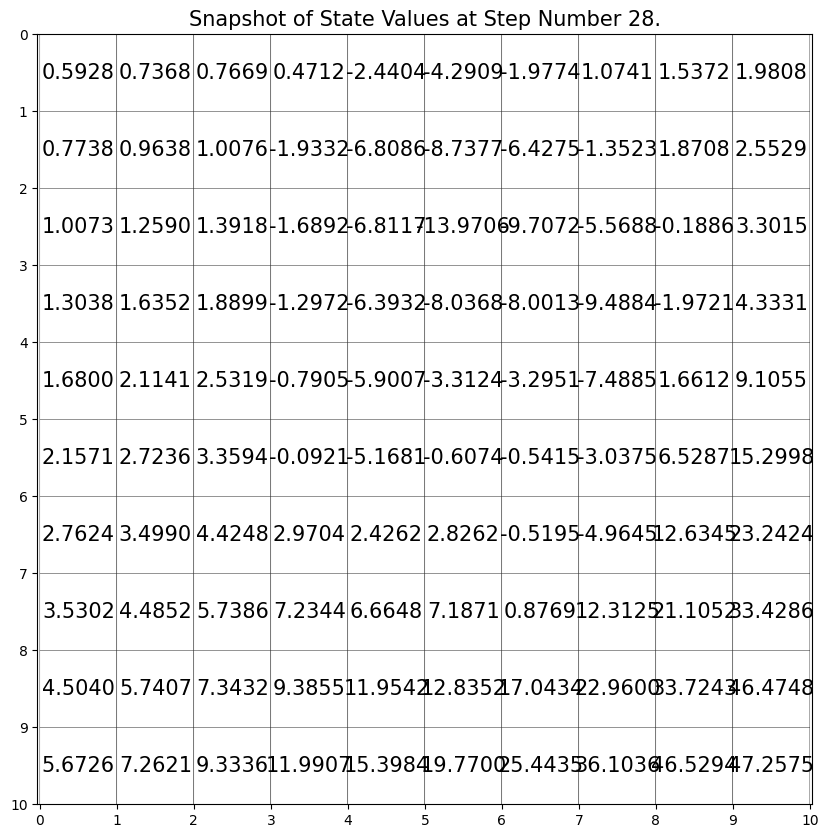

Step Number:  32
Value of Delta:  0.00936301233963377


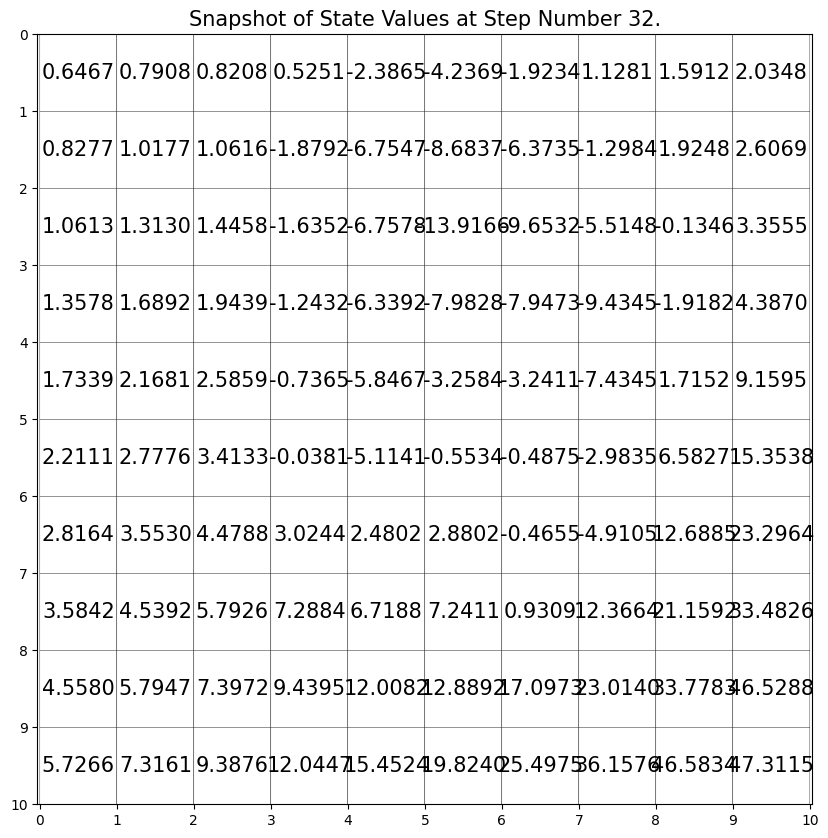

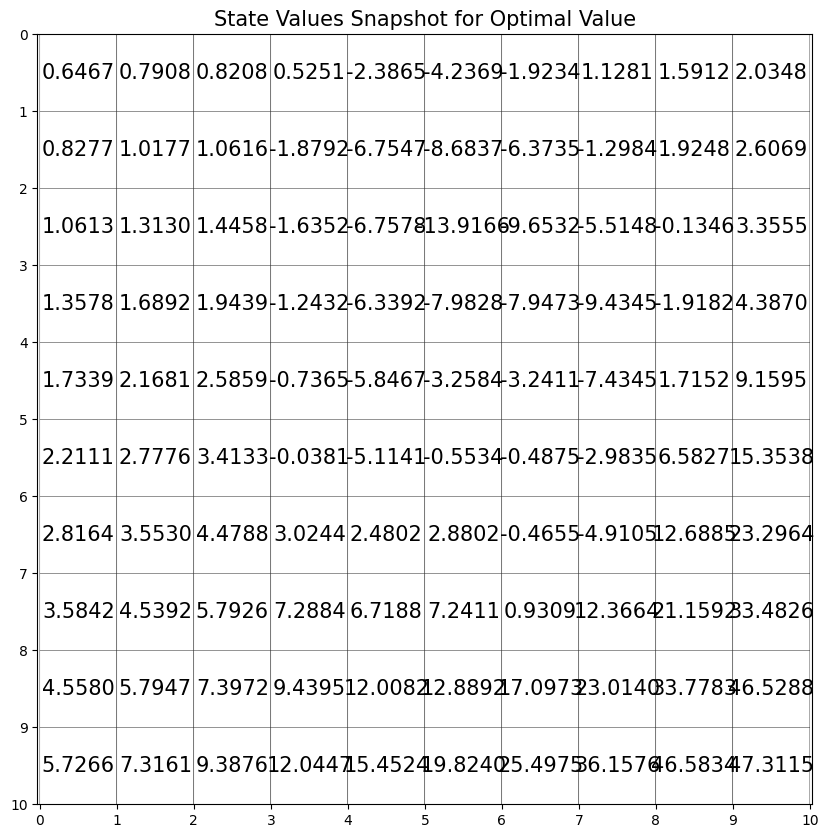

Text(0.5, 1.0, 'Change in delta over Steps')

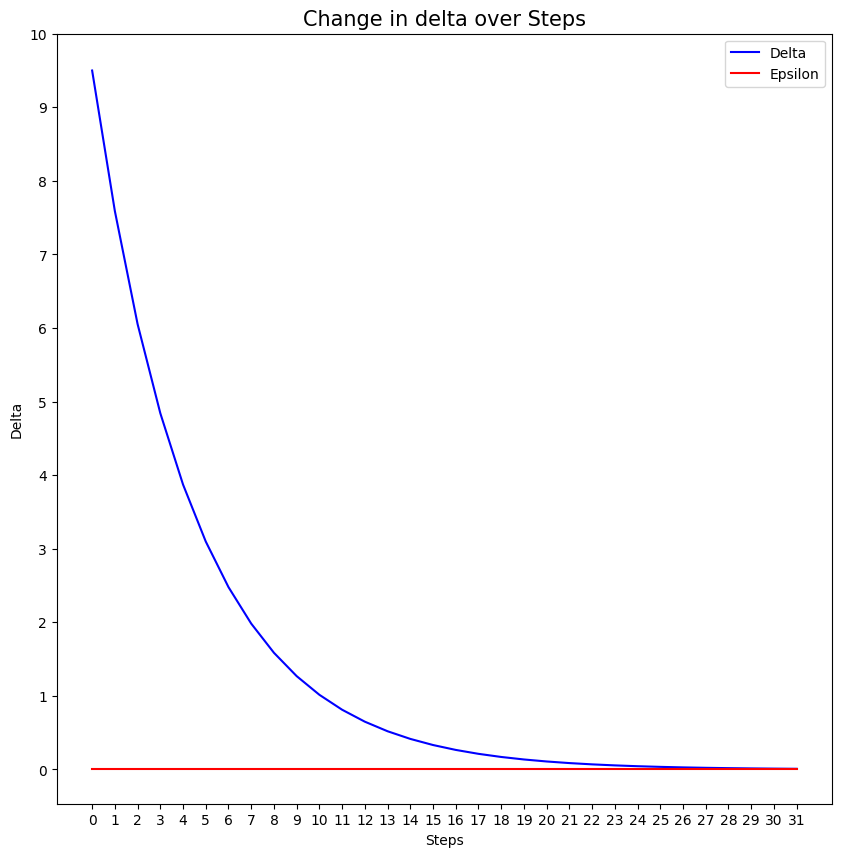

In [ ]:
# plot state values for 5 intermediate steps
for i in range(len(intermediate_V)):
    print("Step Number: ", step_number[i])
    print("Value of Delta: ", intermediate_delta_array[i])
    plot_state_value(intermediate_V[i], "Snapshot of State Values at Step Number {0}.".format(step_number[i]))


# plot state values for optimal value
plot_state_value(optimal_V, "State Values Snapshot for Optimal Value")

# plot change in delta
epsilon_array=[epsilon] * len(all_delta_array)
plt.figure(figsize=(10,10))
plt.plot(all_delta_array, color='blue', label='Delta')
plt.plot(epsilon_array, color='red',label='Epsilon')
plt.xticks(np.arange(0, 32, 1), np.arange(0, 32))
plt.yticks(np.arange(0, grid_size + 1, 1), np.arange(0, grid_size + 1))
plt.xlabel("Steps")
plt.ylabel("Delta")
plt.legend()
plt.title("Change in delta over Steps",fontsize=15)

Question 6: (10 points) Modify the environment of the agent by replacing Reward function 1 with Reward function 2. Use the optimal state-value function implemented in
question 2 to compute the optimal value of each state in the grid. For visualization
purpose, you should generate a figure similar to that of figure 1 but with the number of
state replaced by the optimal value of that state. In this question, you should have 1 plot.

> Refer to the plots above.

> From the optimal value of the state plot, we can see that the values are close to 0 i.e they are low in the initial states and then they start increasing as we reach the states with the maximum reward value.

> From the plots of the different steps, we can see that in each step, the values are increasing. As we can see in the change in delta plot, first the values increase drastically i.e the delta values are high and then it starts becoming constant by the time it reaches the last step.

> State 99 has the highest optimal value which is evident because state 99 has the highest reward for reward function 2. As one moves further from state 99, the optimal value of each state decreases slowly. In addition, the blocks of states which yield negative reward show negative optimal values. The neighboring states near these blocks also have a lower optimal value compared to the neighboring states near the state yielding the highest reward. In other words, as an agent moves towards states with low reward, the optimal values of the neighboring states will progressively decrease, whereas if an agent moves towards desirable states with higher reward, the optimal values of the states it faces will progressively increase. Most of the states have a value of 0 during the earlier steps, yielding a sparse matrix. However, as steps increase, the state values near state 99 (state with highest reward) starts to increase gradually, while the state values near the states with negative reward start to decrease progressively. Since state 99 has the highest reward, the values increase much faster for state 99 and its neighboring states. As the algorithm nears convergence, the sparsity disappears, with most of the states assigned a certain non-zero optimal value, with the states near state 99 being assigned very high and positive values and states near the blocks with negative reward being assigned negative values. We can also observe that the rate of change of state values is faster during initial steps, following a logarithmic rate of convergence.

### QUESTION 7

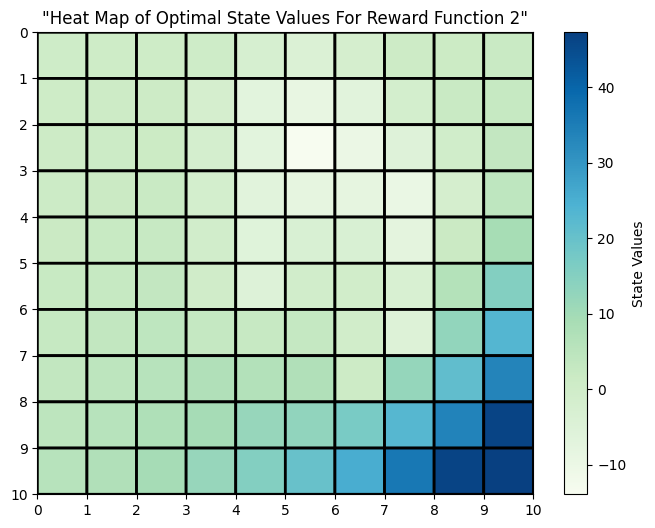

In [ ]:
#Plotting the heatmap
plot_heatmap(optimal_V, '"Heat Map of Optimal State Values For Reward Function 2"', 'State Values')

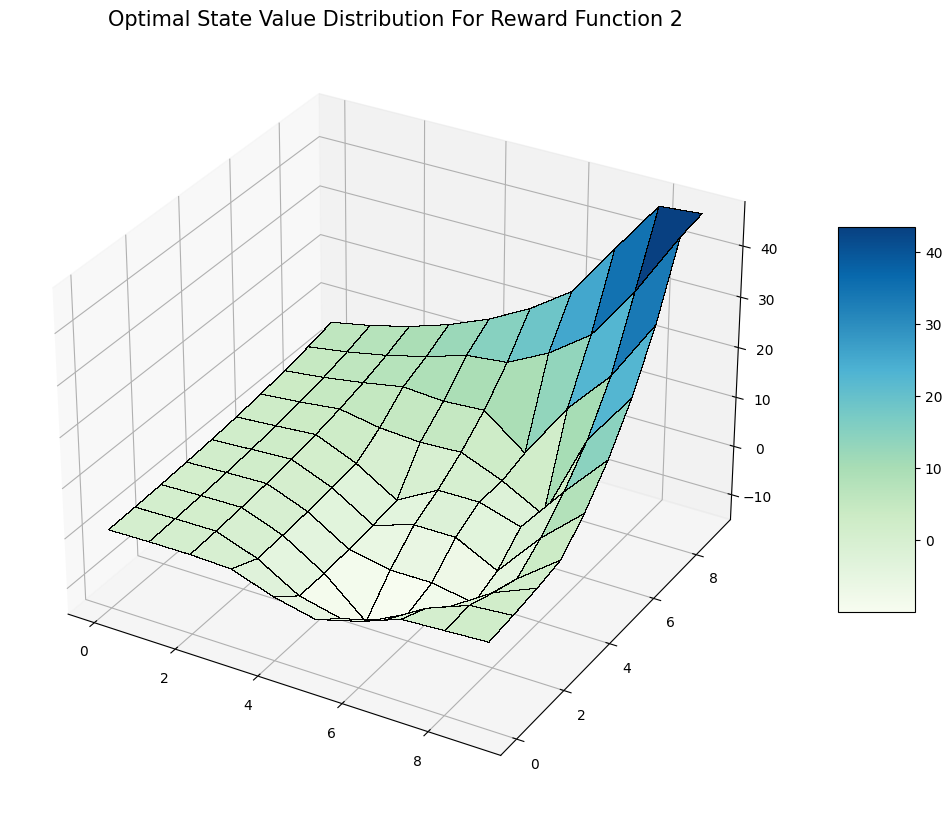

In [ ]:
# plot state values for optimal value
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection = '3d')
X=Y= np.arange(0,10,1)
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X,Y,optimal_V, cmap = "GnBu",edgecolors='black',
                       linewidth=0.01, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title("Optimal State Value Distribution For Reward Function 2",fontsize=15)
plt.show()

Question 7: (20 points) Generate a heat map of the optimal state values (found in
question 6) across the 2-D grid. For generating the heat map, you can use the same
function provided in the hint earlier.
Explain the distribution of the optimal state values across the 2-D grid. (Hint: Use the
figure generated in this question to explain)

> Refer to the plots above. In reward function 2, we observe that some of the states have a negative reward i.e. -100. This means that if the agent moves to that state, it will be getting a negative reward, which is obviously not desirable! Hence, the agent should try to avoid these states. Essentially this means that such states should have lesser optimal state values that the states to which the agent actually wants to go. These states mostly beget a negative optimum state value. This is what is depicted in the above heat map of optimal state values. Here too, the reward for reaching the 99th state is the highest. Thus, the agent will always try to get to this state by avoiding the states as much as possible which give negative reward. Such states with negative optimal values are depicted in lighter green shades in the heat map. This is very prominently observed in the 52nd state of the grid which begets the lightest color. The lightest color signifies that it has the least optimal value. This can be justified because this state is surrounded by states on three sides (up: 51st state, left: 42nd state, right: 62nd state) which have -100 reward. That is why the optimal value of this state is very low, because it is highly possible that if the agent comes to this state then it will most likely land up in one of the neighboring states which have -100 reward. Hence, the agent should avoid this state. That is why it is justified for this state to have a very low
optimal state value. Likewise, for all other states which have light color in the above heat map, their
optimal state values are also low as compared to the states where the agent will actually benefit. Other
states which have also been shown in the shades of green color (but a lighter shade) signify that the
optimal values are close to 0 but positive. This is starkly observed in the upper left part of the grid. If the
agent lands up in some state in the bottom right part of the grid, then it will be easier for him to go to
the 99th state which has the highest reward. Therefore, these states in the bottom right part of the grid
are signified by a high optimal value and a darker blue shade which essentially means that it is beneficial for the
agent to visit these states. Such is the distribution of the optimal state values across the 2-D grid.

> As one moves further from state 99, which is the state providing the highest reward, the optimal value of each state decreases slowly. In addition, the neighboring states near those states yielding negative reward also have a lower optimal value compared to the neighboring states near the state yielding the highest reward. In other words, as an agent moves towards states with low reward, the optimal values of the neighboring states will progressively decrease, whereas if an agent moves towards desirable states with higher reward, the optimal values of the states it faces will progressively increase. The further a state is from the state yielding the highest reward, the lower its value. The patterns seen in the heatmap of reward function 2 are roughly visible in the heatmap of optimal values. We see that the negative rewards form a snake-like chain in the state-space. This chain is roughly visible in the heatmap, with the light green regions corresponding to the states with lowest rewards. In addition, the region near the state with the highest reward is also darker. This provides us with an intuition that it is possible to extract reward function by observing how the environment or an expert behaves. This is roughly what is done in IRL.
We see that state 52 has the lowest optimal value and is being shown the lightest in the heatmap. This is because state 52 is surrounded by states with negative rewards on three sides with only one path that does not penalize the agent. Thus, value iteration encourages the agent to avoid this state, as the probability of landing in a state with negative reward is the highest among all the states if the agent lands on this state. There is a visible, progressive and gradual decay of optimal values surrounding the state with the highest
reward. This is due to the discount factor in the Bellman equation, which discounts future rewards.


### QUESTION 8

In [ ]:
#Finding the optimal policy for Reward Function 2 and printing it
temp_policy=optimal_state_policy(num_states,P_matrix,reward_function,epsilon,discount_factor)
optimal_policy=np.transpose(temp_policy.reshape(10,10))
print(optimal_policy)

[[3 3 3 0 0 1 1 1 1 3]
 [3 3 3 0 0 2 1 1 1 3]
 [3 3 3 0 0 3 1 1 1 3]
 [3 3 3 0 0 3 3 2 1 3]
 [3 3 3 0 0 3 3 3 1 3]
 [3 3 3 0 0 3 3 0 1 3]
 [3 3 3 3 3 3 0 0 1 3]
 [3 3 3 3 3 3 0 3 3 3]
 [1 1 1 3 3 3 3 3 3 3]
 [1 1 1 1 1 1 1 1 1 1]]


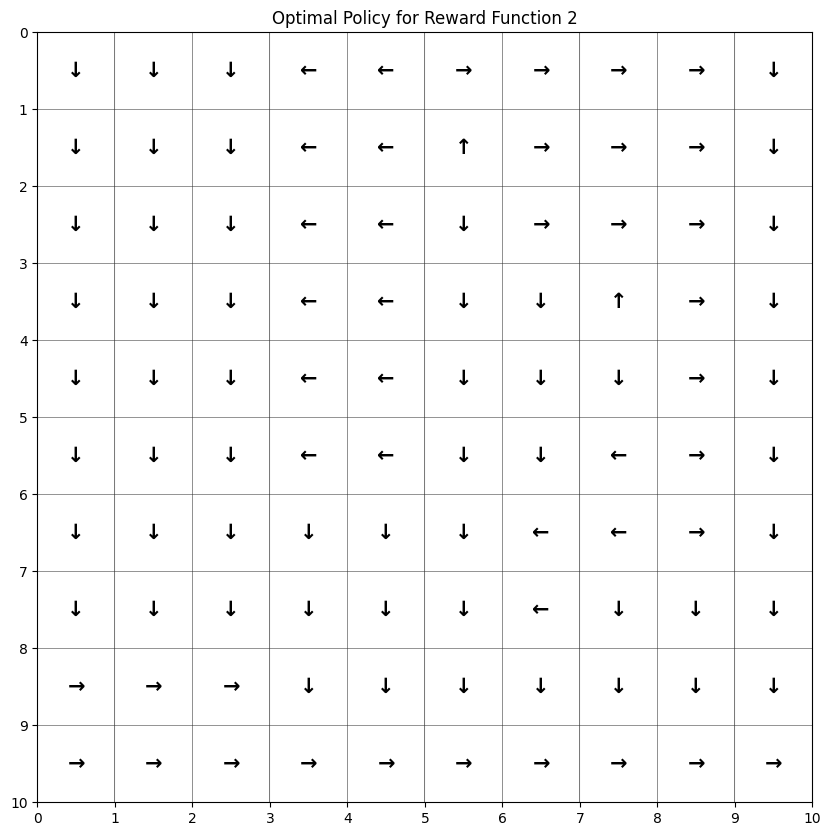

In [ ]:
#Plotting the optimal policy
plot_policy(optimal_policy, "Optimal Policy for Reward Function 2")

Question 8: (20 points) Implement the computation step of the value iteration algorithm
(lines 14-17) to compute the optimal policy of the agent navigating the 2-D state-space.
For visualization purpose, you should generate a figure similar to that of figure 1 but
with the number of state replaced by the optimal action at that state. The optimal actions should be displayed using arrows. Does the optimal policy of the agent match your
intuition? Please provide a brief explanation. In this question, you should have 1 plot.

> Refer to the plot above. In this part of the project, since the reward function has some negative value, it will have some role to play in the estimation and computation step. On the basis of previous results and also intuition, the agent will try to avoid the states which give a negative reward. This is depicted in the grid above where we can see that the arrows are diverging from the state which give a negative reward. For example, if we consider the same example of the 52nd state, then we can see that the arrow in the 52nd state is pointing down, i.e. towards the 53rd state. This is correct because the remaining 3 neighboring states have a negative reward which should be avoided. These 3 states also point in a direction away from the center i.e. the 52nd state. This is desirable, because if not there would have been a chance that the agent would have got locked in the 52nd state. In other states surrounding the states with reward -100, we observe that the arrows do not point to these negatively rewarding states. Again, this is desirable, because we do not want the agent to go to these states. We also observe in the bottom right part of the grid that almost all the arrows are leading to the 99th state. The agent will only move to the state which has the maximum optimum value among all the neighboring states. Again, all this is intuitive as well as justified by our optimal values obtained previously. Thus, the actions of the agent as shown in this grid is validated and justified by the optimal values and the heat map obtained previously.


### QUESTION 9

In [ ]:
#For Reward Function 1
# Compute optimal value for given parameters
num_states=100
discount_factor=0.8
w=0.6
epsilon=0.01
reward_function = reward_function1

# get transition probablities matrix - dimension: (num_actions x num_states_num_states)
P_matrix = transition_probability(w)

# get optimal Value
V,intermediate_V,all_delta_array,intermediate_delta_array,step_number=optimal_value(num_states,P_matrix,reward_function,epsilon,discount_factor)
optimal_V=np.transpose(V.reshape(10,10))

Number of steps for Value Iteration Algorithm to converge: 19
Number of intermediate steps captured: 4
The step numbers captured are: [4, 8, 12, 16]


Step Number:  4
Value of Delta:  0.5820480000000003


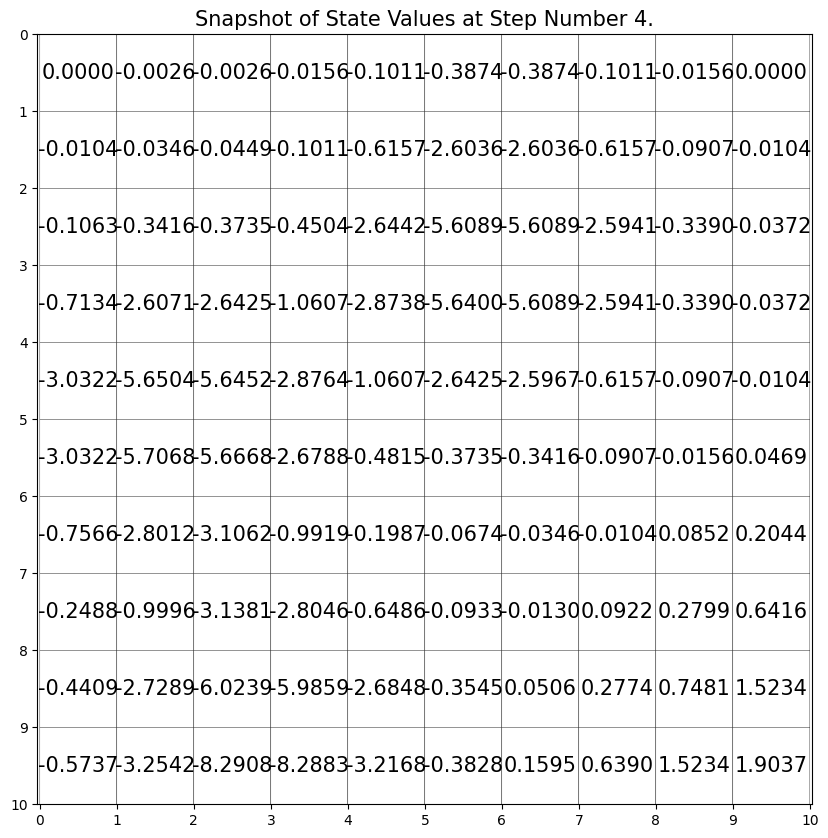

Step Number:  8
Value of Delta:  0.11072197782732784


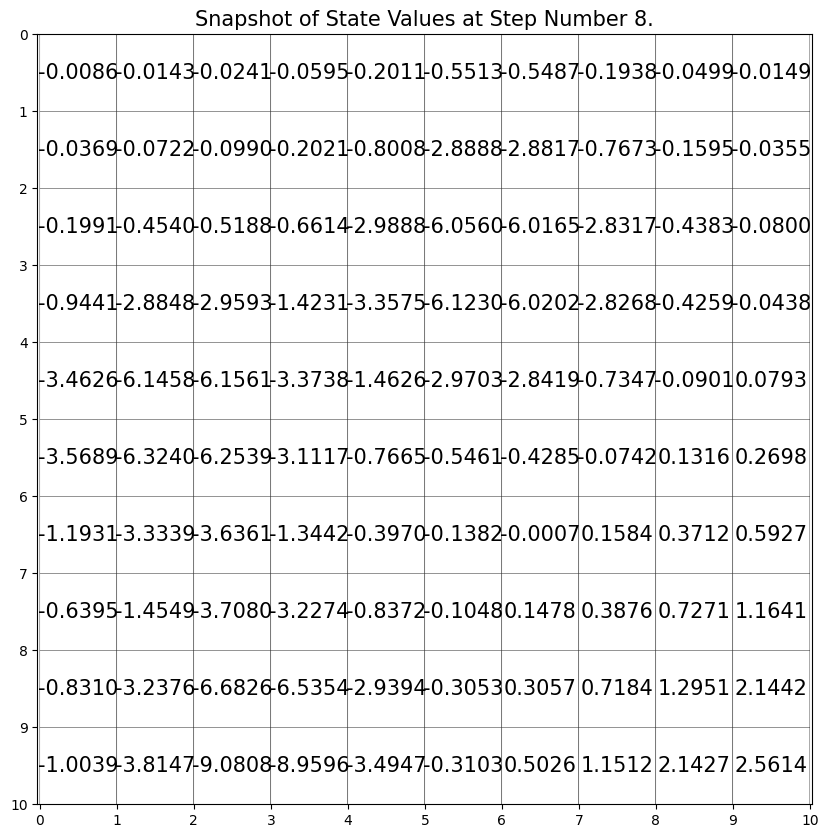

Step Number:  12
Value of Delta:  0.0437785231222545


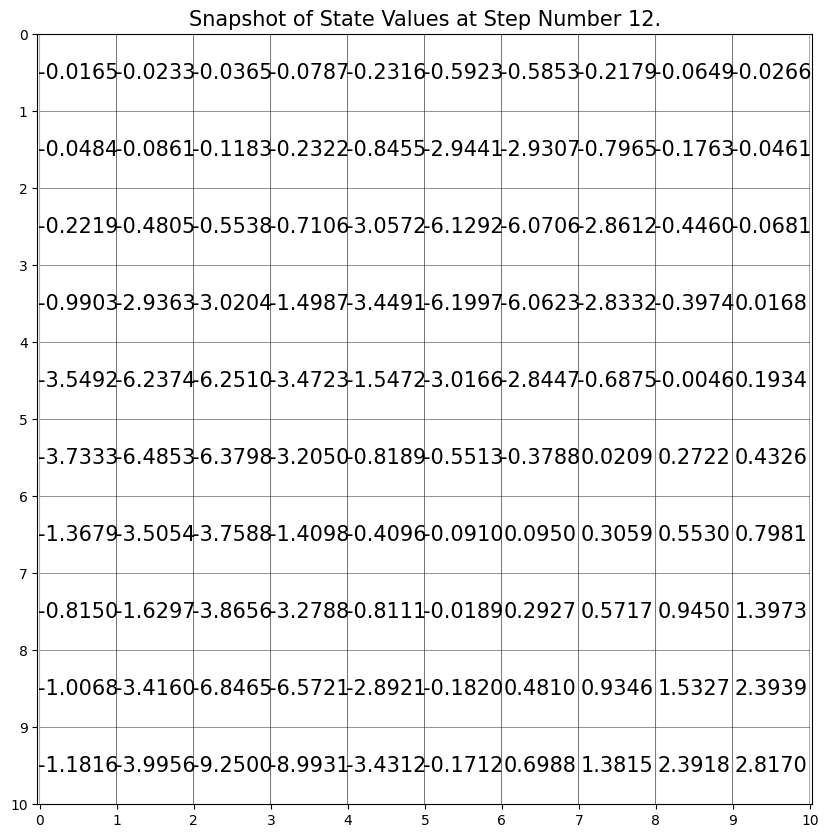

Step Number:  16
Value of Delta:  0.0176390444782073


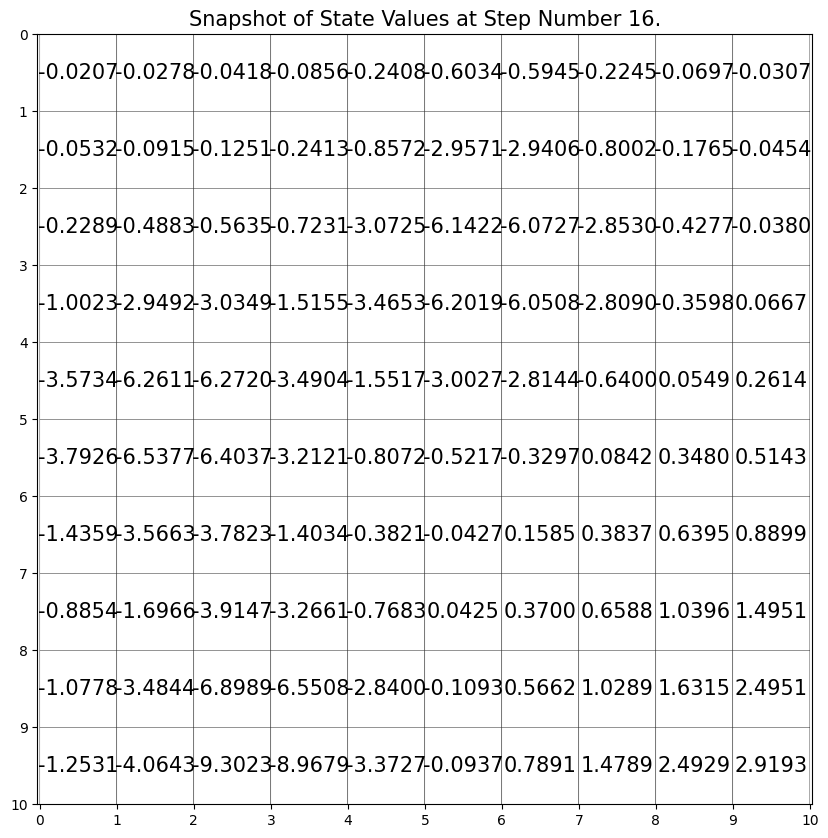

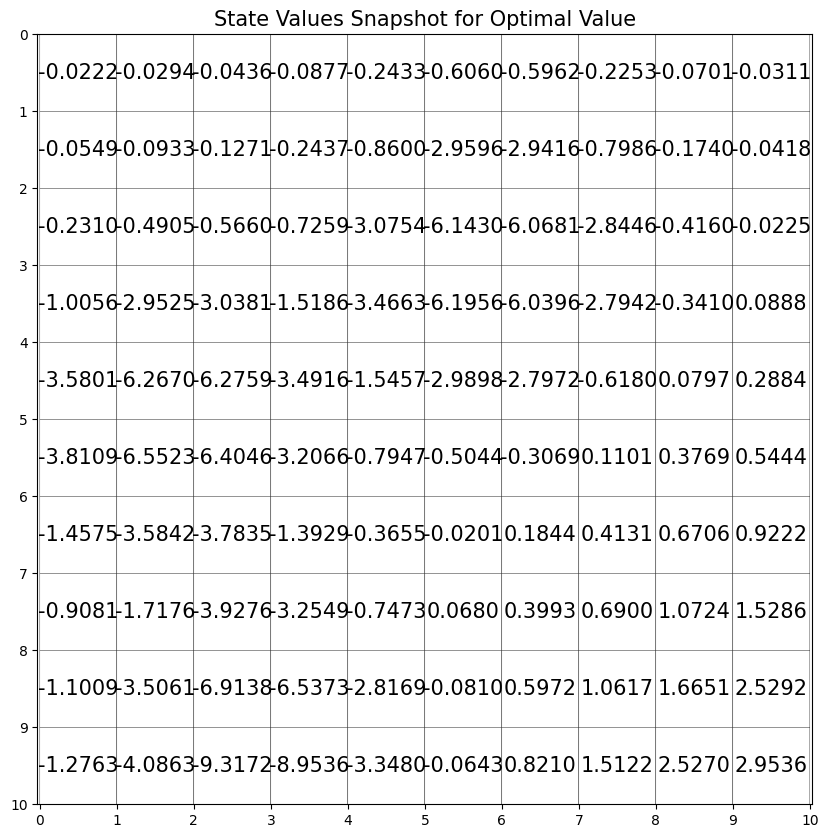

Text(0.5, 1.0, 'Change in delta over Steps')

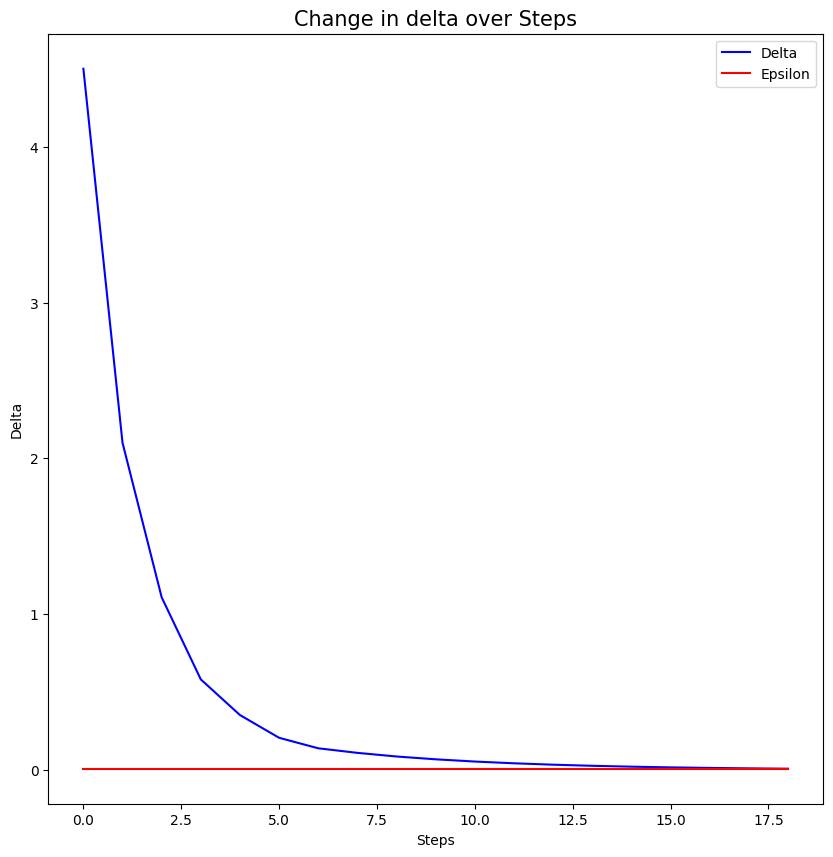

In [ ]:
# plot state values for 5 intermediate steps
for i in range(len(intermediate_V)):
    print("Step Number: ", step_number[i])
    print("Value of Delta: ", intermediate_delta_array[i])
    plot_state_value(intermediate_V[i], "Snapshot of State Values at Step Number {0}.".format(step_number[i]))


# plot state values for optimal value
plot_state_value(optimal_V, "State Values Snapshot for Optimal Value")

# plot change in delta
epsilon_array=[epsilon] * len(all_delta_array)
plt.figure(figsize=(10,10))
plt.plot(all_delta_array, color='blue', label='Delta')
plt.plot(epsilon_array, color='red',label='Epsilon')
plt.xlabel("Steps")
plt.ylabel("Delta")
plt.legend()
plt.title("Change in delta over Steps",fontsize=15)

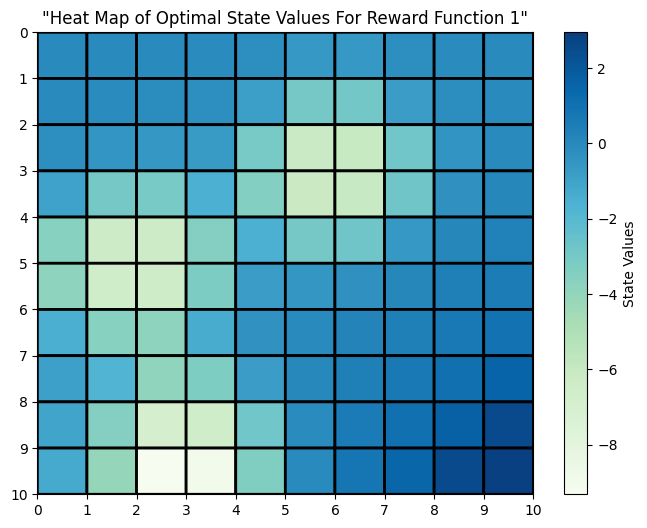

In [ ]:
#Plotting the heatmap
plot_heatmap(optimal_V, '"Heat Map of Optimal State Values For Reward Function 1"', 'State Values')

In [ ]:
#Finding the optimal policy for Reward Function 1
temp_policy=optimal_state_policy(num_states,P_matrix,reward_function,epsilon,discount_factor)
optimal_policy=np.transpose(temp_policy.reshape(10,10))
print(optimal_policy)

[[0 0 0 0 0 0 1 1 1 1]
 [2 2 2 2 2 2 2 1 1 3]
 [2 2 2 2 0 2 1 1 1 3]
 [2 2 2 2 0 3 1 1 1 3]
 [2 2 2 2 3 3 3 3 3 3]
 [3 3 1 1 3 3 3 3 3 3]
 [3 0 1 1 1 1 1 3 3 3]
 [0 0 0 1 1 1 1 1 3 3]
 [2 0 0 1 1 1 1 1 1 3]
 [2 0 0 1 1 1 1 1 1 1]]


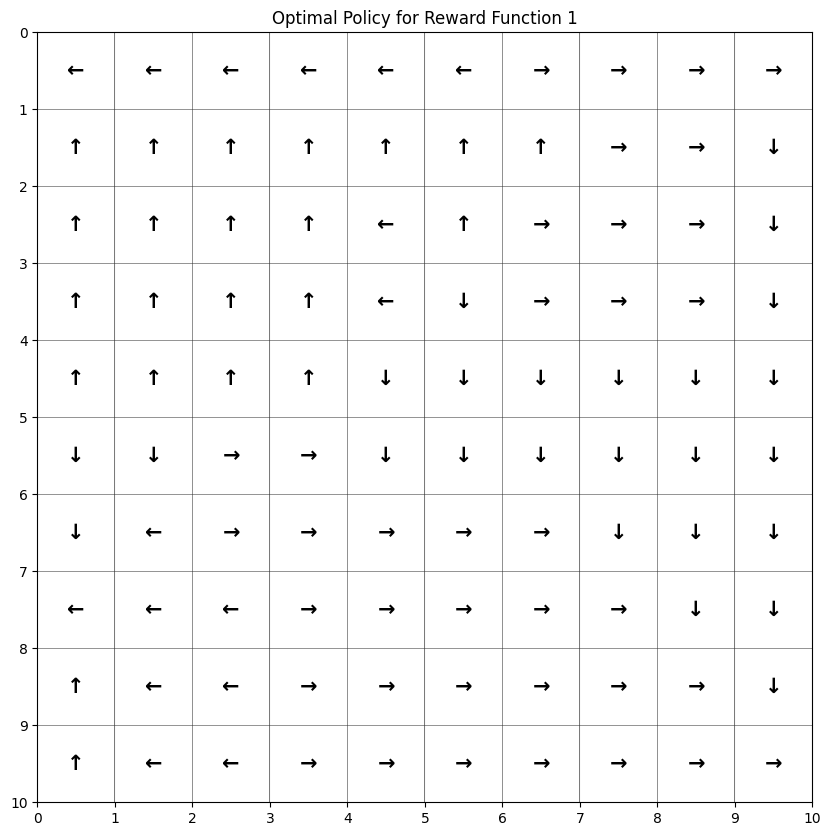

In [ ]:
#Plotting the optimal policy
plot_policy(optimal_policy, "Optimal Policy for Reward Function 1")

In [ ]:
#For Reward Function 2
# Compute optimal value for given parameters
num_states=100
discount_factor=0.8
w=0.6
epsilon=0.01
reward_function = reward_function2

# get transition probablities matrix - dimension: (num_actions x num_states_num_states)
P_matrix = transition_probability(w)

# get optimal Value
V,intermediate_V,all_delta_array,intermediate_delta_array,step_number=optimal_value(num_states,P_matrix,reward_function,epsilon,discount_factor)
optimal_V=np.transpose(V.reshape(10,10))

Number of steps for Value Iteration Algorithm to converge: 27
Number of intermediate steps captured: 6
The step numbers captured are: [4, 8, 12, 16, 20, 24]


Step Number:  4
Value of Delta:  10.493760000000009


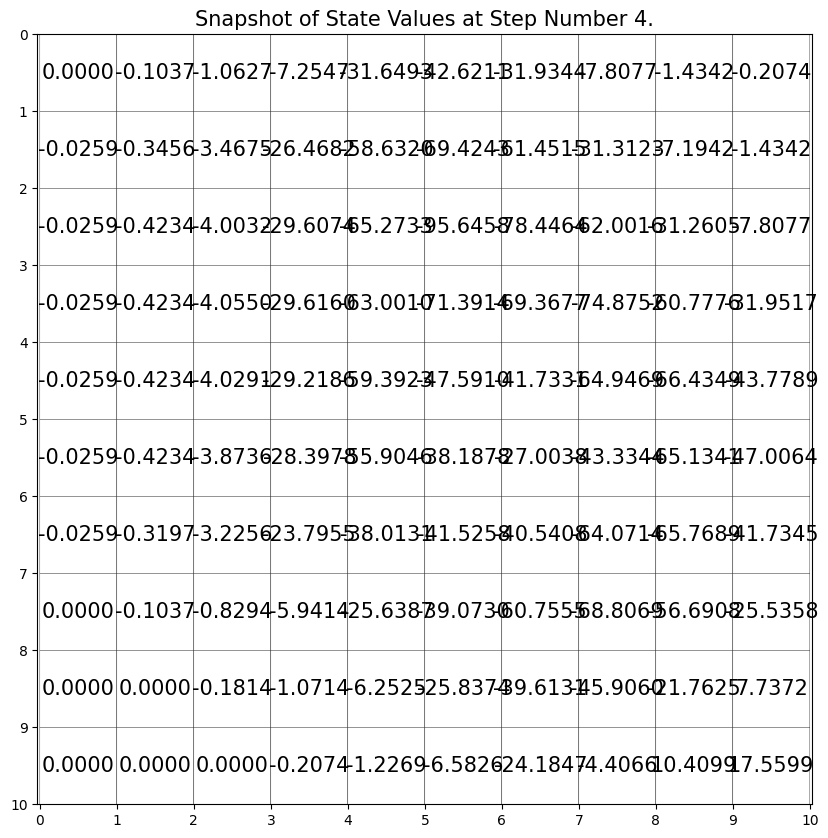

Step Number:  8
Value of Delta:  2.9731592537702483


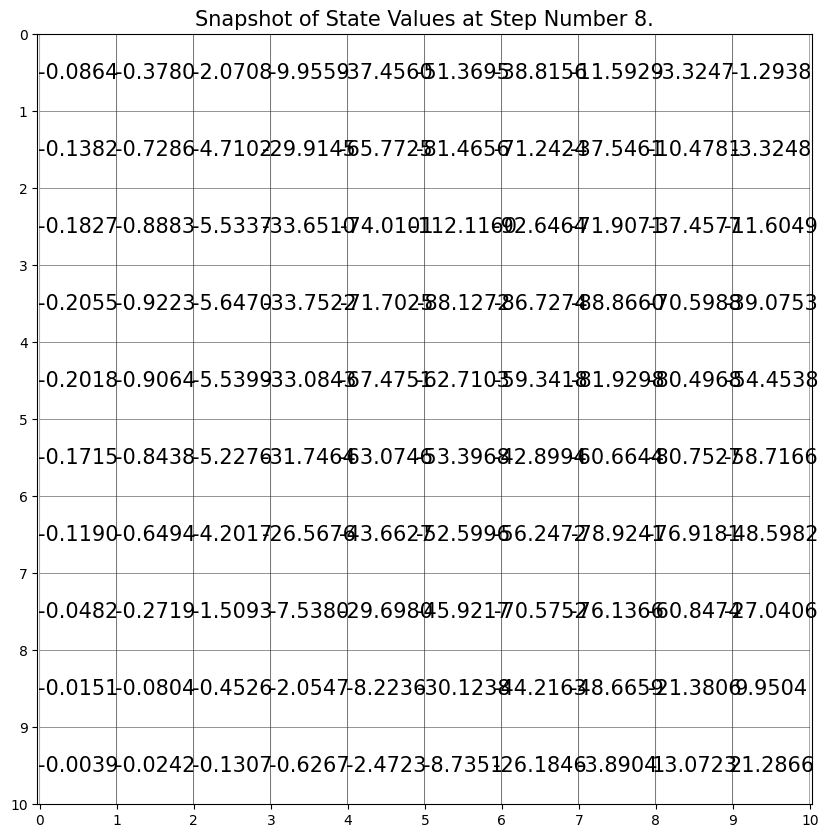

Step Number:  12
Value of Delta:  0.8741292340200459


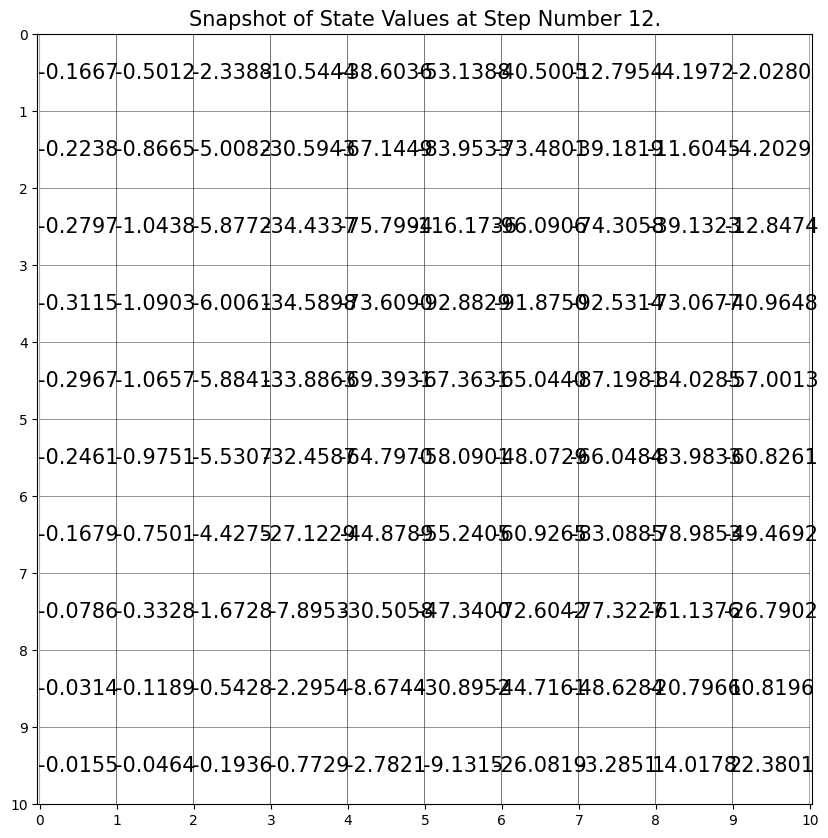

Step Number:  16
Value of Delta:  0.24937028244634973


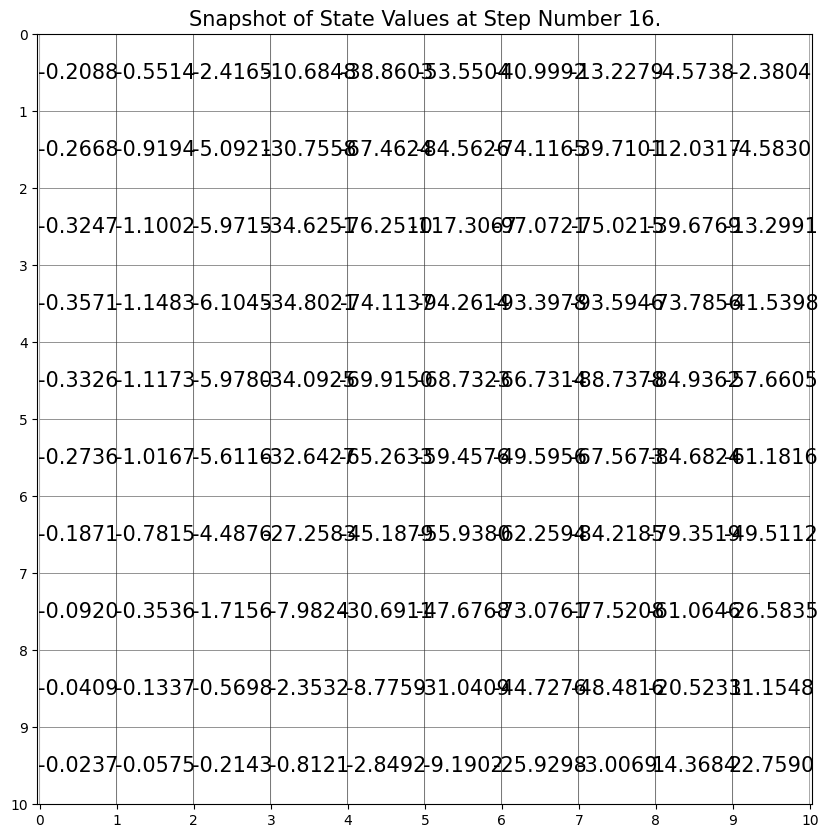

Step Number:  20
Value of Delta:  0.07201548567792315


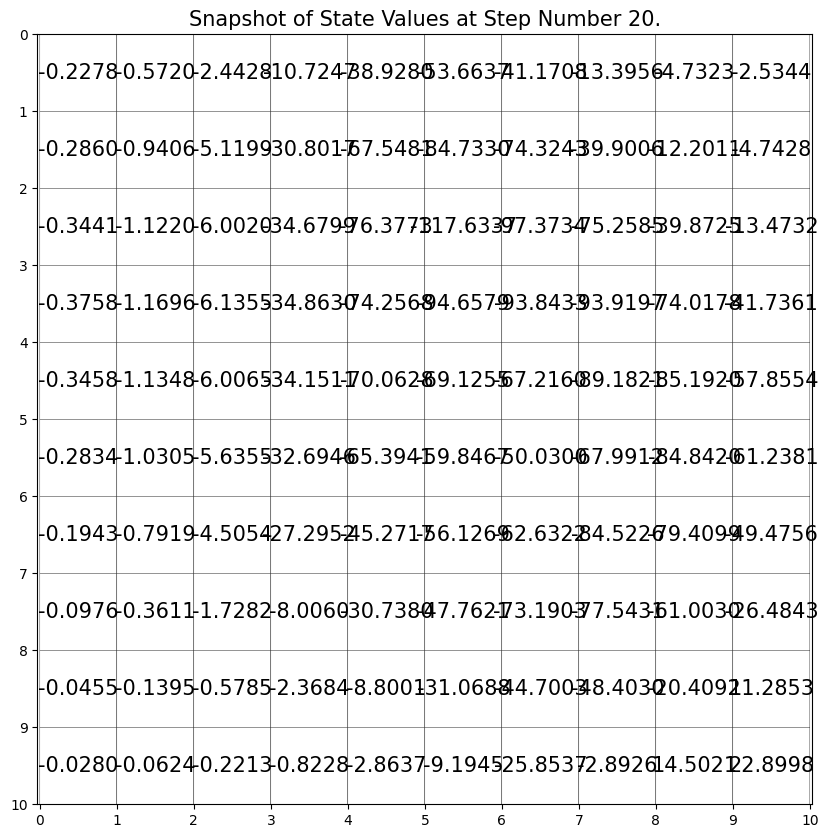

Step Number:  24
Value of Delta:  0.021060829162323103


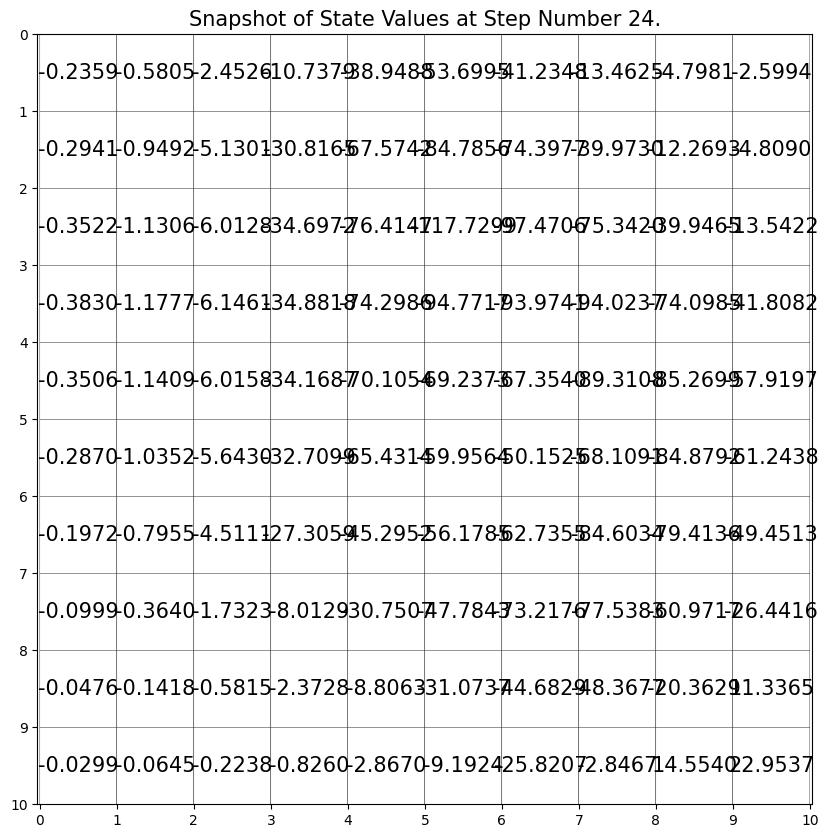

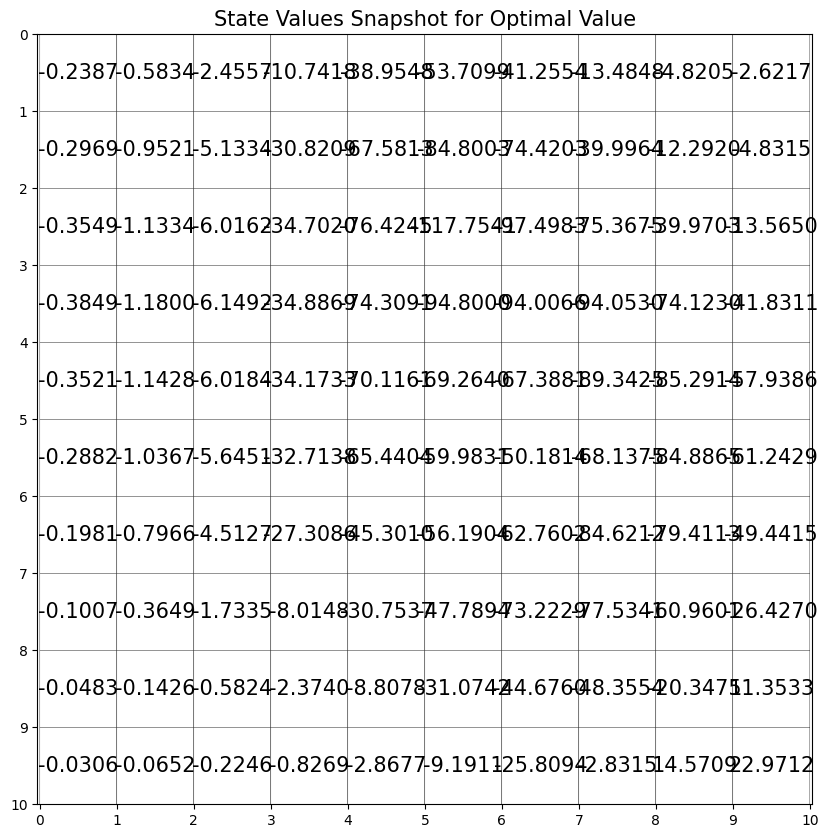

Text(0.5, 1.0, 'Change in delta over Steps')

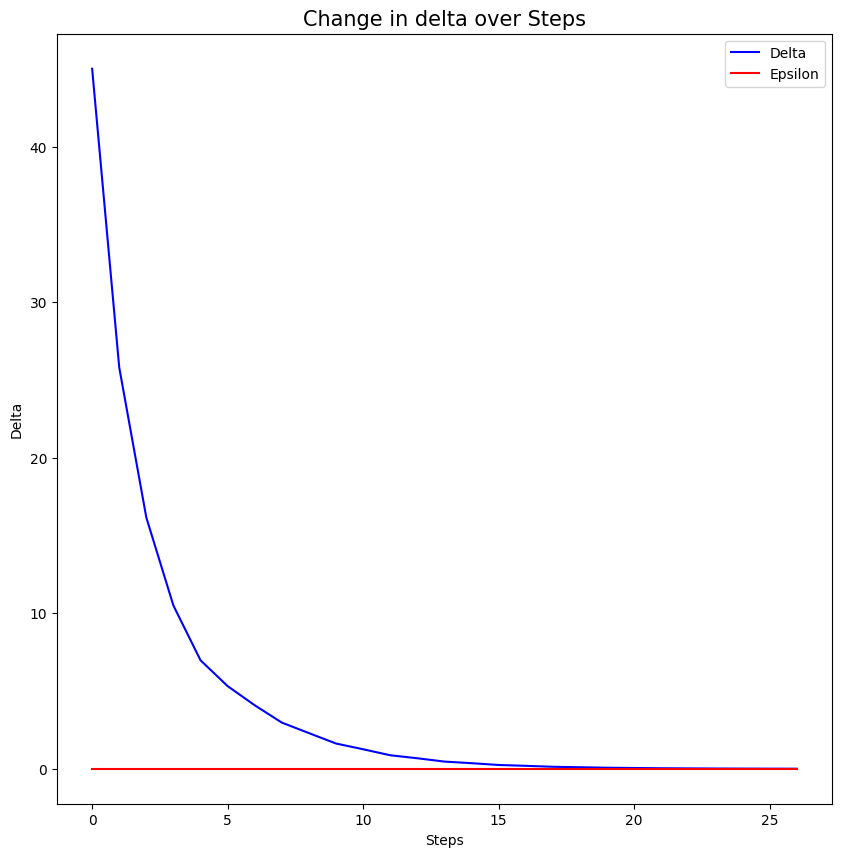

In [ ]:
# plot state values for 5 intermediate steps
for i in range(len(intermediate_V)):
    print("Step Number: ", step_number[i])
    print("Value of Delta: ", intermediate_delta_array[i])
    plot_state_value(intermediate_V[i], "Snapshot of State Values at Step Number {0}.".format(step_number[i]))


# plot state values for optimal value
plot_state_value(optimal_V, "State Values Snapshot for Optimal Value")

# plot change in delta
epsilon_array=[epsilon] * len(all_delta_array)
plt.figure(figsize=(10,10))
plt.plot(all_delta_array, color='blue', label='Delta')
plt.plot(epsilon_array, color='red',label='Epsilon')
plt.xlabel("Steps")
plt.ylabel("Delta")
plt.legend()
plt.title("Change in delta over Steps",fontsize=15)

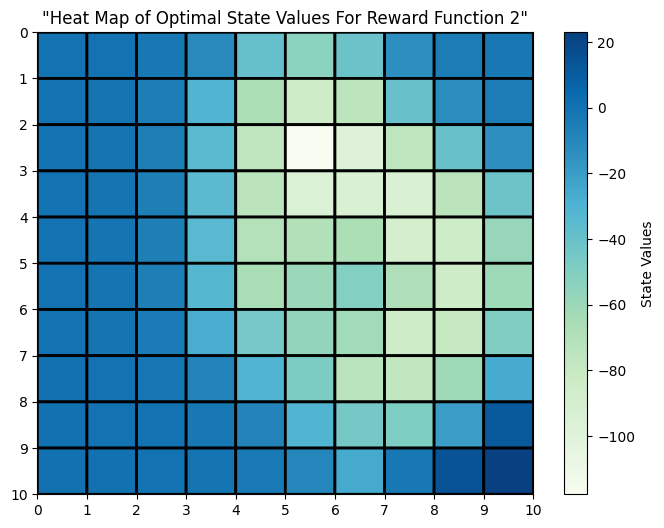

In [ ]:
#Plotting the heatmap
plot_heatmap(optimal_V, '"Heat Map of Optimal State Values For Reward Function 2"', 'State Values')

In [ ]:
#Finding the optimal policy for Reward Function 2
temp_policy=optimal_state_policy(num_states,P_matrix,reward_function,epsilon,discount_factor)
optimal_policy=np.transpose(temp_policy.reshape(10,10))
print(optimal_policy)

[[0 0 0 0 0 0 1 1 1 1]
 [2 0 0 0 0 2 1 1 2 2]
 [2 0 0 0 0 3 1 1 2 2]
 [3 0 0 0 0 3 3 2 2 2]
 [3 0 0 0 0 3 3 0 1 2]
 [3 0 0 0 0 1 0 0 1 3]
 [3 0 0 0 0 3 2 0 1 3]
 [3 0 0 0 0 0 0 3 3 3]
 [3 0 0 0 0 0 3 3 3 3]
 [0 0 0 0 0 0 1 1 1 1]]


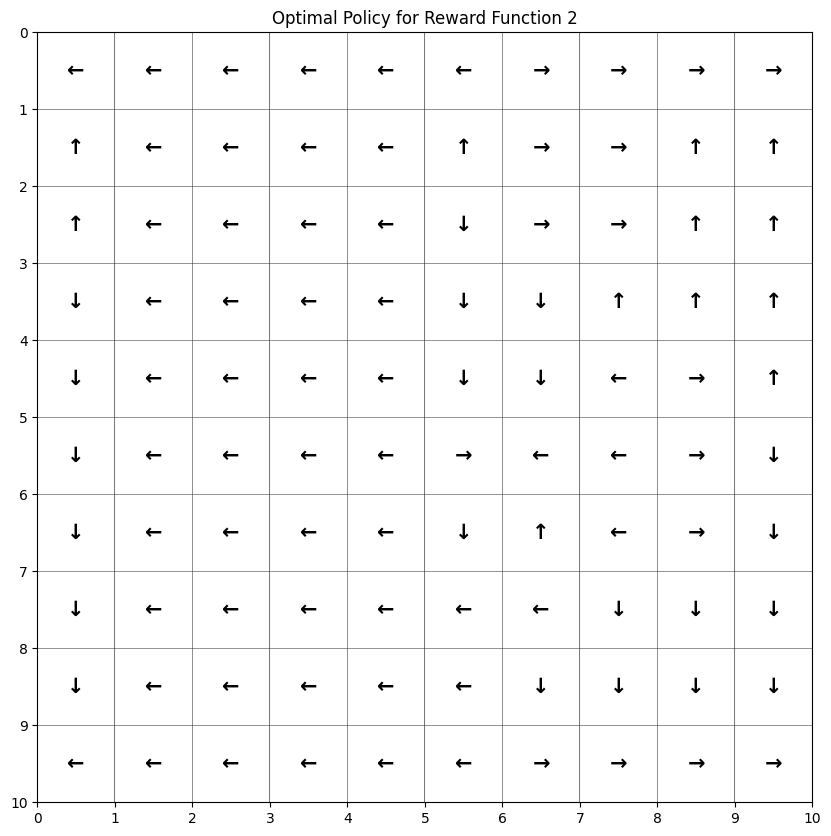

In [ ]:
#Plotting the optimal policy
plot_policy(optimal_policy, "Optimal Policy for Reward Function 2")

Question 9:(20 points) Change the hyper parameter w to 0.6 and find the optimal policy
map similar to previous question for reward functions. Explain the differences you observe. What do you think about value of new w compared to previous value? Choose the
w that you think give rise to better optimal policy and use that w for the next stages of
the project.

> The optimal values for the states neighboring state 99 (state with highest reward), as well as the value for state 99 itself has decreased. The negative value of those states with negative rewards have been amplified. In summary, more states take on higher or lower values instead of just the neighboring states with positive and negative rewards, giving the agent more choice on where to move, ultimately decreasing the probability of landing in the state with highest reward.
For reward function 2, the heatmap and value plots point out that the path to the state with highest optimal value has been cut-off due to the increase in adversarial influence by the negative-reward chain over a longer state-space. This is due to amplification of negative rewards and attenuation of positive rewards.
From the policy plots, it is evident that the increase in influence of negative rewards leads to the agent often moving out of the grid. In addition, fewer paths now exist for both reward functions that can lead to the agent to state 99. This happened because the states neighboring state 99 do not provide any positive or negative reward to the agent (0 reward), causing the values for those states to be overpowered by the states where reward is negative.
We can observe some local optima in the policy plots, where the agent just oscillates between two states. This is called the deadlock condition.
All of the above reasons can be attributed to the exploration versus exploitation dilemma. We can think of it as the probability of exploration. Exploitation is making the best possible decision (by maximizing future reward), and exploration involves taking an immediately suboptimal action to gather information. While the suboptimal action will necessarily involve a reduced amount of reward in the immediate future, it may allow the agent to learn better strategies that enable policy improvement in the long term. If there is no balance between exploration and exploitation, it would lead to a bad sample complexity. In this case, since is very high, the balance has not been achieved, leading to the agent exploring more suboptimal actions at each state rather than exploiting knowledge of optimal values reasonably. This leads to the extracted policy being suboptimal.
The appropriate value of w is 0.1, as the agent is more likely to reach the state with the highest reward while having the option to perform limited exploration and less likely to get stuck in local optima or get blown off the grid. In addition, the radius of adversarial influence of negative reward chains/blocks are reduced and more paths point towards state 99 when w is 0.1.
